# NFL Gambling Project

## Business problem

#### Stakeholder: John Daniels
- non-technical stakeholder
- gambling addict

#### True business problem: 
- 
- 

#### Deliverables: Inference or Prediction?
-
-

#### Context:

- **False negative** 
    - **Outcome**: 
- **False positive** 
    - **Outcome**: 
    
Would prefer reducing fasle positives over fasle negative?

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [2]:
!ls ../'betting data'

nfl_stadiums.csv       spreadspoke.R
nfl_teams.csv          spreadspoke_scores.csv


In [3]:
df = pd.read_csv('../betting data/spreadspoke_scores.csv')

In [4]:
df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN
13230,1/30/2022,2021,Conference,True,Los Angeles Rams,20.0,17.0,San Francisco 49ers,LAR,-3.5,46.0,SoFi Stadium,False,72.0,0.0,NaN,DOME


In [5]:
df = df.loc[(df['schedule_season'] >= 1979) & (df['schedule_week'] != 'Superbowl')]
df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
2501,9/1/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,30,Houlihan's Stadium,False,79.0,9.0,87.0,NaN
2502,9/2/1979,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,39,Ralph Wilson Stadium,False,74.0,15.0,74.0,NaN
2503,9/2/1979,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,31,Soldier Field,False,78.0,11.0,68.0,NaN
2504,9/2/1979,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,31.5,Mile High Stadium,False,69.0,6.0,38.0,NaN
2505,9/2/1979,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,37,Arrowhead Stadium,False,76.0,8.0,71.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,1/22/2022,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,48.5,Nissan Stadium,False,35.0,0.0,43.0,NaN
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10689 entries, 2501 to 13230
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        10689 non-null  object 
 1   schedule_season      10689 non-null  int64  
 2   schedule_week        10689 non-null  object 
 3   schedule_playoff     10689 non-null  bool   
 4   team_home            10689 non-null  object 
 5   score_home           10689 non-null  float64
 6   score_away           10689 non-null  float64
 7   team_away            10689 non-null  object 
 8   team_favorite_id     10689 non-null  object 
 9   spread_favorite      10689 non-null  float64
 10  over_under_line      10689 non-null  object 
 11  stadium              10689 non-null  object 
 12  stadium_neutral      10689 non-null  bool   
 13  weather_temperature  9876 non-null   float64
 14  weather_wind_mph     9876 non-null   float64
 15  weather_humidity     6330 non-nul

In [7]:
df.describe()

,schedule_season,score_home,score_away,spread_favorite,weather_temperature,weather_wind_mph,weather_humidity
count,10689.000000,10689.000000,10689.000000,10689.000000,9876.000000,9876.000000,6330.000000
mean,2000.964169,22.743194,20.065114,-5.387922,59.927299,7.205144,66.558768
std,12.274589,10.371460,10.087142,3.433939,15.443217,5.739954,16.062313
min,1979.000000,0.000000,0.000000,-26.500000,-6.000000,0.000000,4.000000
25%,1991.000000,16.000000,13.000000,-7.000000,50.000000,0.000000,56.000000
50%,2001.000000,23.000000,20.000000,-4.500000,64.000000,7.000000,68.000000
75%,2012.000000,30.000000,27.000000,-3.000000,72.000000,11.000000,78.000000
max,2021.000000,62.000000,59.000000,0.000000,97.000000,40.000000,100.000000


In [8]:
df = df.loc[df['team_favorite_id'] != 'PICK']
df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
2501,9/1/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,30,Houlihan's Stadium,False,79.0,9.0,87.0,NaN
2502,9/2/1979,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,39,Ralph Wilson Stadium,False,74.0,15.0,74.0,NaN
2503,9/2/1979,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,31,Soldier Field,False,78.0,11.0,68.0,NaN
2504,9/2/1979,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,31.5,Mile High Stadium,False,69.0,6.0,38.0,NaN
2505,9/2/1979,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,37,Arrowhead Stadium,False,76.0,8.0,71.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,1/22/2022,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,48.5,Nissan Stadium,False,35.0,0.0,43.0,NaN
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN


In [9]:
df = df.loc[df['stadium_neutral'] == False]
df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
2501,9/1/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,30,Houlihan's Stadium,False,79.0,9.0,87.0,NaN
2502,9/2/1979,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,39,Ralph Wilson Stadium,False,74.0,15.0,74.0,NaN
2503,9/2/1979,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,31,Soldier Field,False,78.0,11.0,68.0,NaN
2504,9/2/1979,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,31.5,Mile High Stadium,False,69.0,6.0,38.0,NaN
2505,9/2/1979,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,37,Arrowhead Stadium,False,76.0,8.0,71.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,1/22/2022,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,48.5,Nissan Stadium,False,35.0,0.0,43.0,NaN
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN


In [10]:
df.loc[(df['schedule_season'] == 2020) & (df['schedule_week'] == '1')]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
12678,9/10/2020,2020,1,False,Kansas City Chiefs,34.0,20.0,Houston Texans,KC,-9.0,54,Arrowhead Stadium,False,NaN,NaN,NaN,NaN
12679,9/13/2020,2020,1,False,Atlanta Falcons,25.0,38.0,Seattle Seahawks,SEA,-1.0,49,Mercedes-Benz Stadium,False,72.0,0.0,NaN,DOME
12680,9/13/2020,2020,1,False,Baltimore Ravens,38.0,6.0,Cleveland Browns,BAL,-7.0,47.5,M&T Bank Stadium,False,NaN,NaN,NaN,NaN
12681,9/13/2020,2020,1,False,Buffalo Bills,27.0,17.0,New York Jets,BUF,-6.5,39.5,New Era Field,False,NaN,NaN,NaN,NaN
12682,9/13/2020,2020,1,False,Carolina Panthers,30.0,34.0,Las Vegas Raiders,LVR,-3.0,48,Bank of America Stadium,False,NaN,NaN,NaN,NaN
12683,9/13/2020,2020,1,False,Cincinnati Bengals,13.0,16.0,Los Angeles Chargers,LAC,-3.0,41.5,Paul Brown Stadium,False,NaN,NaN,NaN,NaN
12684,9/13/2020,2020,1,False,Detroit Lions,23.0,27.0,Chicago Bears,DET,-2.5,42.5,Ford Field,False,72.0,0.0,NaN,DOME
12685,9/13/2020,2020,1,False,Jacksonville Jaguars,27.0,20.0,Indianapolis Colts,IND,-8.0,45,TIAA Bank Field,False,NaN,NaN,NaN,NaN
12686,9/13/2020,2020,1,False,Los Angeles Rams,20.0,17.0,Dallas Cowboys,DAL,-2.0,51.5,SoFi Stadium,False,72.0,0.0,NaN,DOME
12687,9/13/2020,2020,1,False,Minnesota Vikings,34.0,43.0,Green Bay Packers,MIN,-2.5,44.5,U.S. Bank Stadium,False,72.0,0.0,NaN,DOME


In [11]:
home_teams = list(df['team_home'].values)
home_teams

['Tampa Bay Buccaneers',
 'Buffalo Bills',
 'Chicago Bears',
 'Denver Broncos',
 'Kansas City Chiefs',
 'Los Angeles Rams',
 'Minnesota Vikings',
 'New Orleans Saints',
 'New York Jets',
 'Philadelphia Eagles',
 'Seattle Seahawks',
 'St. Louis Cardinals',
 'Washington Redskins',
 'New England Patriots',
 'Denver Broncos',
 'Buffalo Bills',
 'Chicago Bears',
 'Green Bay Packers',
 'Miami Dolphins',
 'New England Patriots',
 'New York Giants',
 'Pittsburgh Steelers',
 'San Diego Chargers',
 'San Francisco 49ers',
 'Philadelphia Eagles',
 'Atlanta Falcons',
 'Cincinnati Bengals',
 'Cleveland Browns',
 'Dallas Cowboys',
 'Green Bay Packers',
 'Houston Oilers',
 'Los Angeles Rams',
 'Minnesota Vikings',
 'New Orleans Saints',
 'New York Jets',
 'San Diego Chargers',
 'Seattle Seahawks',
 'St. Louis Cardinals',
 'Washington Redskins',
 'Buffalo Bills',
 'Cincinnati Bengals',
 'Denver Broncos',
 'Detroit Lions',
 'Kansas City Chiefs',
 'Miami Dolphins',
 'Minnesota Vikings',
 'New England Pat

In [12]:
home_team_ab = []
for team in home_teams:
    if team.__contains__('Cardinals'):
        home_team_ab.append('ARI')
    elif team.__contains__('Falcons'):
        home_team_ab.append('ATL')
    elif team.__contains__('Ravens'):
        home_team_ab.append('BAL')
    elif team.__contains__('Bills'):
        home_team_ab.append('BUF')
    elif team.__contains__('Panthers'):
        home_team_ab.append('CAR')
    elif team.__contains__('Bears'):
        home_team_ab.append('CHI')
    elif team.__contains__('Bengals'):
        home_team_ab.append('CIN')
    elif team.__contains__('Browns'):
        home_team_ab.append('CLE')
    elif team.__contains__('Cowboys'):
        home_team_ab.append('DAL')
    elif team.__contains__('Broncos'):
        home_team_ab.append('DEN')
    elif team.__contains__('Lions'):
        home_team_ab.append('DET')
    elif team.__contains__('Packers'):
        home_team_ab.append('GB')
    elif team.__contains__('Texans'):
        home_team_ab.append('HOU')
    elif team.__contains__('Colts'):
        home_team_ab.append('IND')
    elif team.__contains__('Jaguars'):
        home_team_ab.append('JAX')
    elif team.__contains__('Chiefs'):
        home_team_ab.append('KC')
    elif team.__contains__('Chargers'):
        home_team_ab.append('LAC')
    elif team.__contains__('Rams'):
        home_team_ab.append('LAR')
    elif team.__contains__('Dolphins'):
        home_team_ab.append('MIA')
    elif team.__contains__('Vikings'):
        home_team_ab.append('MIN')
    elif team.__contains__('Patriots'):
        home_team_ab.append('NE')
    elif team.__contains__('Saints'):
        home_team_ab.append('NO')
    elif team.__contains__('Giants'):
        home_team_ab.append('NYG')
    elif team.__contains__('Jets'):
        home_team_ab.append('NYJ')
    elif team.__contains__('Raiders'):
        home_team_ab.append('LVR')
    elif team.__contains__('Eagles'):
        home_team_ab.append('PHI')
    elif team.__contains__('Steelers'):
        home_team_ab.append('PIT')
    elif team.__contains__('Seahawks'):
        home_team_ab.append('SEA')
    elif team.__contains__('49ers'):
        home_team_ab.append('SF')
    elif team.__contains__('Buccaneers'):
        home_team_ab.append('TB')
    elif team.__contains__('Oilers'):
        home_team_ab.append('TEN')
    elif team.__contains__('Titans'):
        home_team_ab.append('TEN')
    elif team.__contains__('Redskins'):
        home_team_ab.append('WAS')
    elif team.__contains__('Football Team'):
        home_team_ab.append('WAS')

In [13]:
df['team_home_id'] = home_team_ab
df

<ipython-input-13-4d440b6f1bf8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team_home_id'] = home_team_ab


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id
2501,9/1/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,30,Houlihan's Stadium,False,79.0,9.0,87.0,NaN,TB
2502,9/2/1979,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,39,Ralph Wilson Stadium,False,74.0,15.0,74.0,NaN,BUF
2503,9/2/1979,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,31,Soldier Field,False,78.0,11.0,68.0,NaN,CHI
2504,9/2/1979,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,31.5,Mile High Stadium,False,69.0,6.0,38.0,NaN,DEN
2505,9/2/1979,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,37,Arrowhead Stadium,False,76.0,8.0,71.0,NaN,KC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,1/22/2022,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,48.5,Nissan Stadium,False,35.0,0.0,43.0,NaN,TEN
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN,KC
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN,TB
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN,KC


In [14]:
away_teams = list(df['team_away'].values)
away_teams

['Detroit Lions',
 'Miami Dolphins',
 'Green Bay Packers',
 'Cincinnati Bengals',
 'Baltimore Colts',
 'Oakland Raiders',
 'San Francisco 49ers',
 'Atlanta Falcons',
 'Cleveland Browns',
 'New York Giants',
 'San Diego Chargers',
 'Dallas Cowboys',
 'Houston Oilers',
 'Pittsburgh Steelers',
 'Los Angeles Rams',
 'Cincinnati Bengals',
 'Minnesota Vikings',
 'New Orleans Saints',
 'Seattle Seahawks',
 'New York Jets',
 'St. Louis Cardinals',
 'Houston Oilers',
 'Oakland Raiders',
 'Dallas Cowboys',
 'Atlanta Falcons',
 'Denver Broncos',
 'New England Patriots',
 'Baltimore Colts',
 'Chicago Bears',
 'Tampa Bay Buccaneers',
 'Kansas City Chiefs',
 'San Francisco 49ers',
 'Miami Dolphins',
 'Philadelphia Eagles',
 'Detroit Lions',
 'Buffalo Bills',
 'Oakland Raiders',
 'Pittsburgh Steelers',
 'New York Giants',
 'New York Jets',
 'Houston Oilers',
 'Seattle Seahawks',
 'Atlanta Falcons',
 'Oakland Raiders',
 'Chicago Bears',
 'Green Bay Packers',
 'San Diego Chargers',
 'Philadelphia Eagle

In [15]:
away_team_ab = []
for team in away_teams:
    if team.__contains__('Cardinals'):
        away_team_ab.append('ARI')
    elif team.__contains__('Falcons'):
        away_team_ab.append('ATL')
    elif team.__contains__('Ravens'):
        away_team_ab.append('BAL')
    elif team.__contains__('Bills'):
        away_team_ab.append('BUF')
    elif team.__contains__('Panthers'):
        away_team_ab.append('CAR')
    elif team.__contains__('Bears'):
        away_team_ab.append('CHI')
    elif team.__contains__('Bengals'):
        away_team_ab.append('CIN')
    elif team.__contains__('Browns'):
        away_team_ab.append('CLE')
    elif team.__contains__('Cowboys'):
        away_team_ab.append('DAL')
    elif team.__contains__('Broncos'):
        away_team_ab.append('DEN')
    elif team.__contains__('Lions'):
        away_team_ab.append('DET')
    elif team.__contains__('Packers'):
        away_team_ab.append('GB')
    elif team.__contains__('Texans'):
        away_team_ab.append('HOU')
    elif team.__contains__('Colts'):
        away_team_ab.append('IND')
    elif team.__contains__('Jaguars'):
        away_team_ab.append('JAX')
    elif team.__contains__('Chiefs'):
        away_team_ab.append('KC')
    elif team.__contains__('Chargers'):
        away_team_ab.append('LAC')
    elif team.__contains__('Rams'):
        away_team_ab.append('LAR')
    elif team.__contains__('Dolphins'):
        away_team_ab.append('MIA')
    elif team.__contains__('Vikings'):
        away_team_ab.append('MIN')
    elif team.__contains__('Patriots'):
        away_team_ab.append('NE')
    elif team.__contains__('Saints'):
        away_team_ab.append('NO')
    elif team.__contains__('Giants'):
        away_team_ab.append('NYG')
    elif team.__contains__('Jets'):
        away_team_ab.append('NYJ')
    elif team.__contains__('Raiders'):
        away_team_ab.append('LVR')
    elif team.__contains__('Eagles'):
        away_team_ab.append('PHI')
    elif team.__contains__('Steelers'):
        away_team_ab.append('PIT')
    elif team.__contains__('Seahawks'):
        away_team_ab.append('SEA')
    elif team.__contains__('49ers'):
        away_team_ab.append('SF')
    elif team.__contains__('Buccaneers'):
        away_team_ab.append('TB')
    elif team.__contains__('Oilers'):
        away_team_ab.append('TEN')
    elif team.__contains__('Titans'):
        away_team_ab.append('TEN')
    elif team.__contains__('Redskins'):
        away_team_ab.append('WAS')
    elif team.__contains__('Football Team'):
        away_team_ab.append('WAS')

In [16]:
df['team_away_id'] = away_team_ab
df

<ipython-input-16-18ba80904101>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['team_away_id'] = away_team_ab


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id
2501,9/1/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,30,Houlihan's Stadium,False,79.0,9.0,87.0,NaN,TB,DET
2502,9/2/1979,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,39,Ralph Wilson Stadium,False,74.0,15.0,74.0,NaN,BUF,MIA
2503,9/2/1979,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,31,Soldier Field,False,78.0,11.0,68.0,NaN,CHI,GB
2504,9/2/1979,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,31.5,Mile High Stadium,False,69.0,6.0,38.0,NaN,DEN,CIN
2505,9/2/1979,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,37,Arrowhead Stadium,False,76.0,8.0,71.0,NaN,KC,IND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,1/22/2022,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,48.5,Nissan Stadium,False,35.0,0.0,43.0,NaN,TEN,CIN
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN,KC,BUF
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN,TB,LAR
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN,KC,CIN


In [17]:
score_home = list(df['score_home'].values)
score_away = list(df['score_away'].values)

In [18]:
score_home

[31.0,
 7.0,
 6.0,
 10.0,
 14.0,
 17.0,
 28.0,
 34.0,
 22.0,
 23.0,
 16.0,
 21.0,
 27.0,
 13.0,
 9.0,
 51.0,
 26.0,
 28.0,
 19.0,
 56.0,
 14.0,
 38.0,
 30.0,
 13.0,
 10.0,
 17.0,
 14.0,
 13.0,
 24.0,
 10.0,
 20.0,
 27.0,
 12.0,
 14.0,
 31.0,
 27.0,
 27.0,
 21.0,
 27.0,
 46.0,
 27.0,
 37.0,
 24.0,
 35.0,
 31.0,
 27.0,
 27.0,
 13.0,
 17.0,
 7.0,
 21.0,
 26.0,
 7.0,
 13.0,
 13.0,
 38.0,
 10.0,
 31.0,
 21.0,
 24.0,
 33.0,
 27.0,
 17.0,
 31.0,
 6.0,
 27.0,
 25.0,
 10.0,
 0.0,
 35.0,
 7.0,
 17.0,
 20.0,
 24.0,
 17.0,
 17.0,
 28.0,
 24.0,
 13.0,
 16.0,
 7.0,
 34.0,
 9.0,
 30.0,
 24.0,
 10.0,
 17.0,
 32.0,
 50.0,
 20.0,
 20.0,
 14.0,
 14.0,
 13.0,
 28.0,
 22.0,
 17.0,
 16.0,
 30.0,
 28.0,
 17.0,
 28.0,
 20.0,
 34.0,
 21.0,
 17.0,
 42.0,
 45.0,
 31.0,
 37.0,
 20.0,
 17.0,
 27.0,
 14.0,
 27.0,
 14.0,
 27.0,
 20.0,
 10.0,
 28.0,
 17.0,
 38.0,
 6.0,
 35.0,
 10.0,
 22.0,
 14.0,
 14.0,
 23.0,
 19.0,
 38.0,
 0.0,
 37.0,
 6.0,
 24.0,
 24.0,
 45.0,
 14.0,
 19.0,
 31.0,
 3.0,
 19.0,
 31.0,
 24.0,
 12.0,

In [19]:
n_home_teams =  list(df['team_home_id'].values)
n_home_teams

['TB',
 'BUF',
 'CHI',
 'DEN',
 'KC',
 'LAR',
 'MIN',
 'NO',
 'NYJ',
 'PHI',
 'SEA',
 'ARI',
 'WAS',
 'NE',
 'DEN',
 'BUF',
 'CHI',
 'GB',
 'MIA',
 'NE',
 'NYG',
 'PIT',
 'LAC',
 'SF',
 'PHI',
 'ATL',
 'CIN',
 'CLE',
 'DAL',
 'GB',
 'TEN',
 'LAR',
 'MIN',
 'NO',
 'NYJ',
 'LAC',
 'SEA',
 'ARI',
 'WAS',
 'BUF',
 'CIN',
 'DEN',
 'DET',
 'KC',
 'MIA',
 'MIN',
 'NE',
 'NYG',
 'PIT',
 'ARI',
 'TB',
 'CLE',
 'ATL',
 'IND',
 'CHI',
 'DAL',
 'DET',
 'TEN',
 'LAR',
 'NO',
 'NYJ',
 'LVR',
 'PHI',
 'LAC',
 'SEA',
 'GB',
 'ATL',
 'IND',
 'BUF',
 'CLE',
 'DEN',
 'TEN',
 'MIN',
 'NE',
 'NO',
 'NYG',
 'PHI',
 'SF',
 'LVR',
 'IND',
 'CHI',
 'CIN',
 'CLE',
 'DAL',
 'GB',
 'KC',
 'MIA',
 'NYG',
 'LVR',
 'LAC',
 'ARI',
 'TB',
 'NYJ',
 'BUF',
 'CLE',
 'DAL',
 'KC',
 'LAR',
 'MIN',
 'NE',
 'NO',
 'NYJ',
 'SF',
 'SEA',
 'TB',
 'WAS',
 'PIT',
 'LVR',
 'IND',
 'CIN',
 'DEN',
 'DET',
 'TEN',
 'LAR',
 'MIA',
 'PIT',
 'SF',
 'ARI',
 'WAS',
 'ATL',
 'ATL',
 'IND',
 'BUF',
 'CHI',
 'DEN',
 'GB',
 'KC',
 'NYG',
 'LV

In [20]:
n_away_teams = list(df['team_away_id'].values)
n_away_teams

['DET',
 'MIA',
 'GB',
 'CIN',
 'IND',
 'LVR',
 'SF',
 'ATL',
 'CLE',
 'NYG',
 'LAC',
 'DAL',
 'TEN',
 'PIT',
 'LAR',
 'CIN',
 'MIN',
 'NO',
 'SEA',
 'NYJ',
 'ARI',
 'TEN',
 'LVR',
 'DAL',
 'ATL',
 'DEN',
 'NE',
 'IND',
 'CHI',
 'TB',
 'KC',
 'SF',
 'MIA',
 'PHI',
 'DET',
 'BUF',
 'LVR',
 'PIT',
 'NYG',
 'NYJ',
 'TEN',
 'SEA',
 'ATL',
 'LVR',
 'CHI',
 'GB',
 'LAC',
 'PHI',
 'IND',
 'WAS',
 'LAR',
 'DAL',
 'WAS',
 'BUF',
 'TB',
 'CIN',
 'MIN',
 'CLE',
 'ARI',
 'NYG',
 'MIA',
 'DEN',
 'PIT',
 'SF',
 'KC',
 'NE',
 'GB',
 'NYJ',
 'CHI',
 'PIT',
 'LAC',
 'ARI',
 'DAL',
 'DET',
 'LAR',
 'TB',
 'WAS',
 'SEA',
 'MIA',
 'TEN',
 'NE',
 'PIT',
 'WAS',
 'LAR',
 'DET',
 'DEN',
 'BUF',
 'SF',
 'ATL',
 'SEA',
 'PHI',
 'NO',
 'MIN',
 'IND',
 'CIN',
 'ARI',
 'NYG',
 'LAC',
 'CHI',
 'MIA',
 'DET',
 'LVR',
 'ATL',
 'TEN',
 'GB',
 'PHI',
 'DEN',
 'LAC',
 'NE',
 'PHI',
 'KC',
 'BUF',
 'NYJ',
 'NYG',
 'GB',
 'DAL',
 'CHI',
 'CLE',
 'NO',
 'SEA',
 'TB',
 'CIN',
 'NE',
 'DET',
 'NO',
 'NYJ',
 'LAC',
 'DAL',
 

In [21]:
len(n_away_teams)

10498

In [22]:
len(score_home)

10498

In [23]:
list(range(0,10689))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [24]:
fav_team = list(df['team_favorite_id'].values)

In [25]:
fav_team

['TB',
 'MIA',
 'CHI',
 'DEN',
 'KC',
 'LAR',
 'MIN',
 'NO',
 'NYJ',
 'PHI',
 'SEA',
 'DAL',
 'TEN',
 'PIT',
 'DEN',
 'CIN',
 'CHI',
 'GB',
 'MIA',
 'NE',
 'ARI',
 'PIT',
 'LAC',
 'DAL',
 'PHI',
 'DEN',
 'NE',
 'CLE',
 'DAL',
 'GB',
 'TEN',
 'LAR',
 'MIA',
 'NO',
 'NYJ',
 'LAC',
 'SEA',
 'PIT',
 'WAS',
 'BUF',
 'TEN',
 'DEN',
 'ATL',
 'LVR',
 'MIA',
 'MIN',
 'NE',
 'PHI',
 'PIT',
 'ARI',
 'LAR',
 'DAL',
 'ATL',
 'IND',
 'CHI',
 'DAL',
 'DET',
 'TEN',
 'LAR',
 'NO',
 'MIA',
 'DEN',
 'PIT',
 'LAC',
 'SEA',
 'NE',
 'ATL',
 'NYJ',
 'BUF',
 'PIT',
 'LAC',
 'TEN',
 'DAL',
 'NE',
 'LAR',
 'TB',
 'PHI',
 'SEA',
 'MIA',
 'TEN',
 'NE',
 'PIT',
 'CLE',
 'DAL',
 'GB',
 'DEN',
 'MIA',
 'NYG',
 'LVR',
 'LAC',
 'ARI',
 'TB',
 'NYJ',
 'BUF',
 'CLE',
 'DAL',
 'KC',
 'LAC',
 'MIN',
 'NE',
 'NO',
 'LVR',
 'ATL',
 'TEN',
 'TB',
 'PHI',
 'PIT',
 'LAC',
 'NE',
 'CIN',
 'DEN',
 'BUF',
 'TEN',
 'LAR',
 'MIA',
 'PIT',
 'CHI',
 'ARI',
 'WAS',
 'SEA',
 'ATL',
 'IND',
 'NE',
 'CHI',
 'DEN',
 'NYJ',
 'LAC',
 'DAL'

In [26]:
df['team_home_id'].value_counts()

PIT    361
SF     360
PHI    359
NE     359
DEN    357
GB     354
DAL    354
MIA    351
KC     349
NYG    349
CHI    349
WAS    348
MIN    347
TEN    347
SEA    346
IND    345
LVR    344
BUF    341
CIN    341
NYJ    340
LAC    340
LAR    340
NO     340
ATL    339
ARI    338
TB     338
DET    334
CLE    315
CAR    219
BAL    215
JAX    212
HOU    167
Name: team_home_id, dtype: int64

In [27]:
len(df['team_home'])

10498

In [28]:
df['team_favorite_id'].value_counts()

PIT    468
NE     457
DAL    444
SF     442
DEN    437
GB     421
PHI    398
MIN    384
MIA    363
KC     361
NO     361
SEA    360
LAC    355
LAR    342
NYG    335
TEN    333
BUF    331
LVR    328
WAS    325
IND    323
CHI    320
ATL    308
NYJ    287
TB     277
CIN    275
BAL    253
DET    241
CLE    234
ARI    233
CAR    204
JAX    168
HOU    130
Name: team_favorite_id, dtype: int64

In [29]:
favorite_win = []
for score in list(range(0,10498)):
    if score_home[score] > score_away[score]:
        if n_home_teams[score] == fav_team[score]:
            favorite_win.append(True)
        else:
            favorite_win.append(False)
    elif score_home[score] < score_away[score]:
        if n_away_teams[score] == fav_team[score]:
            favorite_win.append(True)
        else:
            favorite_win.append(False)
    elif score_home[score] == score_away[score]:
        favorite_win.append(False)

In [30]:
favorite_win

[True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 False,
 True,
 True,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 True,
 False,
 True,
 False,
 True,
 False,


In [31]:
len(favorite_win)

10498

In [32]:
df['favorite_win'] = favorite_win
df

<ipython-input-32-dd1b700f8d22>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['favorite_win'] = favorite_win


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,favorite_win
2501,9/1/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,30,Houlihan's Stadium,False,79.0,9.0,87.0,NaN,TB,DET,True
2502,9/2/1979,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,39,Ralph Wilson Stadium,False,74.0,15.0,74.0,NaN,BUF,MIA,True
2503,9/2/1979,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,31,Soldier Field,False,78.0,11.0,68.0,NaN,CHI,GB,True
2504,9/2/1979,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,31.5,Mile High Stadium,False,69.0,6.0,38.0,NaN,DEN,CIN,True
2505,9/2/1979,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,37,Arrowhead Stadium,False,76.0,8.0,71.0,NaN,KC,IND,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,1/22/2022,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,48.5,Nissan Stadium,False,35.0,0.0,43.0,NaN,TEN,CIN,False
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,54.0,Arrowhead Stadium,False,35.0,6.0,54.0,NaN,KC,BUF,True
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,48.0,Raymond James Stadium,False,50.0,11.0,69.0,NaN,TB,LAR,False
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,54.5,Arrowhead Stadium,False,41.0,4.0,41.0,NaN,KC,CIN,False


In [33]:
df['weather_detail'].value_counts()

DOME                    2360
Rain                     102
DOME (Open Roof)          56
Fog                       28
Rain | Fog                20
Snow                      14
Snow | Fog                 5
Snow | Freezing Rain       1
Name: weather_detail, dtype: int64

In [34]:
df['favorite_win'].value_counts(normalize = True)

True     0.659364
False    0.340636
Name: favorite_win, dtype: float64

In [35]:
df['favorite_home'] = list((df['team_home_id'] == df['team_favorite_id']).values)
df

<ipython-input-35-802a7480603d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['favorite_home'] = list((df['team_home_id'] == df['team_favorite_id']).values)


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,favorite_win,favorite_home
2501,9/1/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,Houlihan's Stadium,False,79.0,9.0,87.0,NaN,TB,DET,True,True
2502,9/2/1979,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,...,Ralph Wilson Stadium,False,74.0,15.0,74.0,NaN,BUF,MIA,True,False
2503,9/2/1979,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,...,Soldier Field,False,78.0,11.0,68.0,NaN,CHI,GB,True,True
2504,9/2/1979,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,...,Mile High Stadium,False,69.0,6.0,38.0,NaN,DEN,CIN,True,True
2505,9/2/1979,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,...,Arrowhead Stadium,False,76.0,8.0,71.0,NaN,KC,IND,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,1/22/2022,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,Nissan Stadium,False,35.0,0.0,43.0,NaN,TEN,CIN,False,True
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,Arrowhead Stadium,False,35.0,6.0,54.0,NaN,KC,BUF,True,True
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,Raymond James Stadium,False,50.0,11.0,69.0,NaN,TB,LAR,False,True
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,Arrowhead Stadium,False,41.0,4.0,41.0,NaN,KC,CIN,False,True


In [36]:
n_home_teams

['TB',
 'BUF',
 'CHI',
 'DEN',
 'KC',
 'LAR',
 'MIN',
 'NO',
 'NYJ',
 'PHI',
 'SEA',
 'ARI',
 'WAS',
 'NE',
 'DEN',
 'BUF',
 'CHI',
 'GB',
 'MIA',
 'NE',
 'NYG',
 'PIT',
 'LAC',
 'SF',
 'PHI',
 'ATL',
 'CIN',
 'CLE',
 'DAL',
 'GB',
 'TEN',
 'LAR',
 'MIN',
 'NO',
 'NYJ',
 'LAC',
 'SEA',
 'ARI',
 'WAS',
 'BUF',
 'CIN',
 'DEN',
 'DET',
 'KC',
 'MIA',
 'MIN',
 'NE',
 'NYG',
 'PIT',
 'ARI',
 'TB',
 'CLE',
 'ATL',
 'IND',
 'CHI',
 'DAL',
 'DET',
 'TEN',
 'LAR',
 'NO',
 'NYJ',
 'LVR',
 'PHI',
 'LAC',
 'SEA',
 'GB',
 'ATL',
 'IND',
 'BUF',
 'CLE',
 'DEN',
 'TEN',
 'MIN',
 'NE',
 'NO',
 'NYG',
 'PHI',
 'SF',
 'LVR',
 'IND',
 'CHI',
 'CIN',
 'CLE',
 'DAL',
 'GB',
 'KC',
 'MIA',
 'NYG',
 'LVR',
 'LAC',
 'ARI',
 'TB',
 'NYJ',
 'BUF',
 'CLE',
 'DAL',
 'KC',
 'LAR',
 'MIN',
 'NE',
 'NO',
 'NYJ',
 'SF',
 'SEA',
 'TB',
 'WAS',
 'PIT',
 'LVR',
 'IND',
 'CIN',
 'DEN',
 'DET',
 'TEN',
 'LAR',
 'MIA',
 'PIT',
 'SF',
 'ARI',
 'WAS',
 'ATL',
 'ATL',
 'IND',
 'BUF',
 'CHI',
 'DEN',
 'GB',
 'KC',
 'NYG',
 'LV

In [37]:
df['stadium'].value_counts()

Giants Stadium                496
Lambeau Field                 354
Arrowhead Stadium             349
Soldier Field                 339
Qualcomm Stadium              301
                             ... 
Lumen Field                     8
Memorial Stadium (Clemson)      7
Caesars Superdome               7
State Farm Stadium              7
Tiger Stadium (LSU)             4
Name: stadium, Length: 79, dtype: int64

In [38]:
df_1 = pd.read_csv('../betting data/nfl_teams.csv')

In [39]:
df_1

,team_name,team_name_short,team_id,team_id_pfr,team_conference,team_division,team_conference_pre2002,team_division_pre2002
0,Arizona Cardinals,Cardinals,ARI,CRD,NFC,NFC West,NFC,NFC West
1,Phoenix Cardinals,Cardinals,ARI,CRD,NFC,NaN,NFC,NFC East
2,St. Louis Cardinals,Cardinals,ARI,ARI,NFC,NaN,NFC,NFC East
3,Atlanta Falcons,Falcons,ATL,ATL,NFC,NFC South,NFC,NFC West
4,Baltimore Ravens,Ravens,BAL,RAV,AFC,AFC North,AFC,AFC Central
5,Buffalo Bills,Bills,BUF,BUF,AFC,AFC East,AFC,AFC East
6,Carolina Panthers,Panthers,CAR,CAR,NFC,NFC South,NFC,NFC West
7,Chicago Bears,Bears,CHI,CHI,NFC,NFC North,NFC,NFC Central
8,Cincinnati Bengals,Bengals,CIN,CIN,AFC,AFC North,AFC,AFC Central
9,Cleveland Browns,Browns,CLE,CLE,AFC,AFC North,AFC,AFC Central


In [40]:
df_2 = pd.read_csv('../betting data/nfl_stadiums.csv', encoding = 'latin_1')

In [41]:
df_2

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
0,Alamo Dome,"San Antonio, TX",NaN,NaN,indoor,"100 Montana St, San Antonio, TX 78203",78203,dome,72000,FieldTurf,NaN,NaN,NaN,NaN,NaN
1,Allegiant Stadium,"Paradise, NV",2020.0,NaN,indoor,NaN,NaN,dome,65000,Grass,NaN,NaN,NaN,NaN,NaN
2,Alltel Stadium,"Jacksonville, FL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alumni Stadium,"Chestnut Hill, MA",NaN,NaN,outdoor,"Perimeter Rd, Chestnut Hill, MA 02467",2467,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN
4,Anaheim Stadium,"Anaheim, CA",1980.0,1994.0,outdoor,"2000 E Gene Autry Way, Anaheim, CA 92806",92806,warm,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,War Memorial Stadium,"Buffalo, NY",1960.0,1972.0,outdoor,"285 Dodge Street, Buffalo, NY 14208",14208,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,Wembley Stadium,"London, UK",2007.0,NaN,outdoor,"Wembley, London HA9 0WS, United Kingdom","Heathrow, UK",moderate,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,Wrigley Field,"Chicago, IL",1920.0,1970.0,outdoor,"1060 West Addison Street, Chicago, IL 60613",60613,cold,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,Yale Bowl,"New Haven, CT",NaN,NaN,outdoor,"276 Derby Ave, West Haven, CT 06516",6516,cold,NaN,Grass,NaN,NaN,NaN,NaN,NaN


In [42]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   stadium_name                  106 non-null    object 
 1   stadium_location              106 non-null    object 
 2   stadium_open                  82 non-null     float64
 3   stadium_close                 41 non-null     float64
 4   stadium_type                  99 non-null     object 
 5   stadium_address               94 non-null     object 
 6   stadium_weather_station_code  93 non-null     object 
 7   stadium_weather_type          99 non-null     object 
 8   stadium_capacity              45 non-null     object 
 9   stadium_surface               59 non-null     object 
 10  STATION                       55 non-null     object 
 11  NAME                          55 non-null     object 
 12  LATITUDE                      55 non-null     float64
 13  LONGI

In [43]:
df_2['ELEVATION'].value_counts()

182.9     3
8.8       3
163.4     3
375.2     3
1611.2    3
178.0     3
15.2      2
13.4      2
24.4      2
2.1       2
193.9     2
93.0      2
238.0     2
29.6      2
5.8       2
366.7     2
3.0       2
47.5      2
2.4       2
265.8     2
189.0     1
145.4     1
1.8       1
209.4     1
6.1       1
227.1     1
177.7     1
264.9     1
221.9     1
Name: ELEVATION, dtype: int64

In [44]:
df_2.loc[df_2['ELEVATION'] >= 1600]

,stadium_name,stadium_location,stadium_open,stadium_close,stadium_type,stadium_address,stadium_weather_station_code,stadium_weather_type,stadium_capacity,stadium_surface,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION
20,Empower Field at Mile High,"Denver, CO",2001.0,NaN,outdoor,"1701 Bryant St, Denver, CO 80204",80204,cold,"76,125",Grass,USW00023062,"DENVER STAPLETON, CO US",39.7633,-104.8694,1611.2
59,Mile High Stadium,"Denver, CO",1960.0,2000.0,outdoor,"1701 Bryant St, Denver, CO 80204",80204,cold,NaN,NaN,USW00023062,"DENVER STAPLETON, CO US",39.7633,-104.8694,1611.2
83,Sports Authority Field at Mile High,"Denver, CO",2001.0,NaN,outdoor,"1701 Bryant St, Denver, CO 80204",80204,cold,"76,125",Grass,USW00023062,"DENVER STAPLETON, CO US",39.7633,-104.8694,1611.2


In [45]:
df_2['stadium_name']

0                Alamo Dome
1         Allegiant Stadium
2            Alltel Stadium
3            Alumni Stadium
4           Anaheim Stadium
               ...         
101    War Memorial Stadium
102         Wembley Stadium
103           Wrigley Field
104               Yale Bowl
105          Yankee Stadium
Name: stadium_name, Length: 106, dtype: object

In [46]:
df_2 = df_2[['ELEVATION','stadium_name']]

In [47]:
df_2

,ELEVATION,stadium_name
0,NaN,Alamo Dome
1,NaN,Allegiant Stadium
2,NaN,Alltel Stadium
3,NaN,Alumni Stadium
4,NaN,Anaheim Stadium
...,...,...
101,NaN,War Memorial Stadium
102,NaN,Wembley Stadium
103,NaN,Wrigley Field
104,NaN,Yale Bowl


In [48]:
df_2 = df_2.rename(columns = {'stadium_name':'stadium'})

In [49]:
df_2

,ELEVATION,stadium
0,NaN,Alamo Dome
1,NaN,Allegiant Stadium
2,NaN,Alltel Stadium
3,NaN,Alumni Stadium
4,NaN,Anaheim Stadium
...,...,...
101,NaN,War Memorial Stadium
102,NaN,Wembley Stadium
103,NaN,Wrigley Field
104,NaN,Yale Bowl


In [50]:
df

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,favorite_win,favorite_home
2501,9/1/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,Houlihan's Stadium,False,79.0,9.0,87.0,NaN,TB,DET,True,True
2502,9/2/1979,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,...,Ralph Wilson Stadium,False,74.0,15.0,74.0,NaN,BUF,MIA,True,False
2503,9/2/1979,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,...,Soldier Field,False,78.0,11.0,68.0,NaN,CHI,GB,True,True
2504,9/2/1979,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,...,Mile High Stadium,False,69.0,6.0,38.0,NaN,DEN,CIN,True,True
2505,9/2/1979,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,...,Arrowhead Stadium,False,76.0,8.0,71.0,NaN,KC,IND,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13226,1/22/2022,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,Nissan Stadium,False,35.0,0.0,43.0,NaN,TEN,CIN,False,True
13227,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,Arrowhead Stadium,False,35.0,6.0,54.0,NaN,KC,BUF,True,True
13228,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,Raymond James Stadium,False,50.0,11.0,69.0,NaN,TB,LAR,False,True
13229,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,Arrowhead Stadium,False,41.0,4.0,41.0,NaN,KC,CIN,False,True


In [51]:
df_n = pd.merge(df, df_2, how='left', on = 'stadium')
df_n

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,favorite_win,favorite_home,ELEVATION
0,9/1/1979,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,False,79.0,9.0,87.0,NaN,TB,DET,True,True,5.8
1,9/2/1979,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,...,False,74.0,15.0,74.0,NaN,BUF,MIA,True,False,178.0
2,9/2/1979,1979,1,False,Chicago Bears,6.0,3.0,Green Bay Packers,CHI,-3.0,...,False,78.0,11.0,68.0,NaN,CHI,GB,True,True,177.7
3,9/2/1979,1979,1,False,Denver Broncos,10.0,0.0,Cincinnati Bengals,DEN,-3.0,...,False,69.0,6.0,38.0,NaN,DEN,CIN,True,True,1611.2
4,9/2/1979,1979,1,False,Kansas City Chiefs,14.0,0.0,Baltimore Colts,KC,-1.0,...,False,76.0,8.0,71.0,NaN,KC,IND,True,True,264.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,1/22/2022,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,False,35.0,0.0,43.0,NaN,TEN,CIN,False,True,182.9
10494,1/23/2022,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,False,35.0,6.0,54.0,NaN,KC,BUF,True,True,264.9
10495,1/23/2022,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,False,50.0,11.0,69.0,NaN,TB,LAR,False,True,5.8
10496,1/30/2022,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,False,41.0,4.0,41.0,NaN,KC,CIN,False,True,264.9


In [52]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10498 entries, 0 to 10497
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        10498 non-null  object 
 1   schedule_season      10498 non-null  int64  
 2   schedule_week        10498 non-null  object 
 3   schedule_playoff     10498 non-null  bool   
 4   team_home            10498 non-null  object 
 5   score_home           10498 non-null  float64
 6   score_away           10498 non-null  float64
 7   team_away            10498 non-null  object 
 8   team_favorite_id     10498 non-null  object 
 9   spread_favorite      10498 non-null  float64
 10  over_under_line      10498 non-null  object 
 11  stadium              10498 non-null  object 
 12  stadium_neutral      10498 non-null  bool   
 13  weather_temperature  9694 non-null   float64
 14  weather_wind_mph     9694 non-null   float64
 15  weather_humidity     6223 non-null  

In [53]:
df_n['schedule_date'] = pd.to_datetime(df_n['schedule_date'])

In [54]:
df_n = df_n.sort_values(by=['schedule_date'])

In [55]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10498 entries, 0 to 10497
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   schedule_date        10498 non-null  datetime64[ns]
 1   schedule_season      10498 non-null  int64         
 2   schedule_week        10498 non-null  object        
 3   schedule_playoff     10498 non-null  bool          
 4   team_home            10498 non-null  object        
 5   score_home           10498 non-null  float64       
 6   score_away           10498 non-null  float64       
 7   team_away            10498 non-null  object        
 8   team_favorite_id     10498 non-null  object        
 9   spread_favorite      10498 non-null  float64       
 10  over_under_line      10498 non-null  object        
 11  stadium              10498 non-null  object        
 12  stadium_neutral      10498 non-null  bool          
 13  weather_temperature  9694 non-n

In [56]:
df_n['ELEVATION'].value_counts()

2.1       689
366.7     361
2.4       360
24.4      359
3.0       359
1611.2    357
209.4     354
163.4     354
8.8       351
264.9     349
193.9     341
177.7     339
5.8       338
178.0     330
238.0     315
145.4     301
375.2     274
47.5      248
1.8       223
221.9     212
182.9     199
6.1       183
93.0      183
13.4      167
29.6      157
15.2      147
227.1     118
189.0      68
265.8      40
Name: ELEVATION, dtype: int64

In [57]:
df_n.loc[df_n['ELEVATION'] == 2.1]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,favorite_win,favorite_home,ELEVATION
8,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,False,73.0,10.0,76.0,NaN,NYJ,CLE,False,True,2.1
20,1979-09-09,1979,2,False,New York Giants,14.0,27.0,St. Louis Cardinals,ARI,-3.0,...,False,63.0,13.0,54.0,NaN,NYG,ARI,True,False,2.1
34,1979-09-16,1979,3,False,New York Jets,31.0,10.0,Detroit Lions,NYJ,-6.0,...,False,65.0,10.0,55.0,NaN,NYJ,DET,True,True,2.1
47,1979-09-23,1979,4,False,New York Giants,13.0,17.0,Philadelphia Eagles,PHI,-5.0,...,False,61.0,16.0,58.0,NaN,NYG,PHI,True,False,2.1
60,1979-09-30,1979,5,False,New York Jets,33.0,27.0,Miami Dolphins,MIA,-4.0,...,False,67.0,13.0,83.0,NaN,NYJ,MIA,False,False,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,2021-12-12,2021,14,False,New York Jets,9.0,30.0,New Orleans Saints,NO,-4.5,...,False,NaN,NaN,NaN,NaN,NYJ,NO,True,False,2.1
10431,2021-12-19,2021,15,False,New York Giants,6.0,21.0,Dallas Cowboys,DAL,-12.0,...,False,37.0,8.0,54.0,NaN,NYG,DAL,True,False,2.1
10450,2021-12-26,2021,16,False,New York Jets,26.0,21.0,Jacksonville Jaguars,NYJ,-2.5,...,False,47.0,0.0,49.0,NaN,NYJ,JAX,True,True,2.1
10464,2022-01-02,2021,17,False,New York Jets,24.0,28.0,Tampa Bay Buccaneers,TB,-14.0,...,False,57.0,9.0,82.0,NaN,NYJ,TB,True,False,2.1


In [58]:
(df_n.loc[df_n['ELEVATION'].isna()])['stadium'].value_counts()

Louisiana Superdome              291
Hubert H. Humphrey Metrodome     220
Georgia Dome                     212
FedEx Field                      201
RCA Dome                         194
Pontiac Silverdome               176
Edward Jones Dome                166
Ford Field                       159
Seattle Kingdome                 155
Houston Astrodome                140
Anaheim Stadium                  121
Atlanta-Fulton County Stadium     96
U.S. Bank Stadium                 49
Mercedes-Benz Superdome           38
Mall of America Field             38
SoFi Stadium                      35
Mercedes-Benz Stadium             31
TIAA Bank Field                   29
Allegiant Stadium                 17
Memorial Stadium (Champaign)      10
Highmark Stadium                  10
Lumen Field                        8
Liberty Bowl Memorial Stadium      8
Caesars Superdome                  7
Memorial Stadium (Clemson)         7
Tiger Stadium (LSU)                4
Name: stadium, dtype: int64

In [59]:
elevation = list(df_n['ELEVATION'].values)

In [60]:
elevation

[5.8,
 15.2,
 189.0,
 nan,
 2.1,
 nan,
 3.0,
 nan,
 264.9,
 1611.2,
 177.7,
 178.0,
 265.8,
 24.4,
 1611.2,
 2.1,
 2.4,
 366.7,
 24.4,
 145.4,
 209.4,
 177.7,
 178.0,
 8.8,
 3.0,
 189.0,
 nan,
 145.4,
 2.1,
 nan,
 nan,
 265.8,
 209.4,
 163.4,
 238.0,
 193.9,
 nan,
 nan,
 15.2,
 24.4,
 5.8,
 189.0,
 366.7,
 2.1,
 265.8,
 nan,
 264.9,
 8.8,
 1611.2,
 193.9,
 178.0,
 238.0,
 3.0,
 1.8,
 2.1,
 nan,
 nan,
 163.4,
 nan,
 145.4,
 177.7,
 47.5,
 nan,
 nan,
 nan,
 209.4,
 nan,
 2.4,
 3.0,
 nan,
 24.4,
 265.8,
 2.1,
 1611.2,
 238.0,
 178.0,
 47.5,
 nan,
 1.8,
 2.1,
 5.8,
 189.0,
 145.4,
 1.8,
 8.8,
 163.4,
 209.4,
 47.5,
 177.7,
 264.9,
 238.0,
 193.9,
 2.1,
 5.8,
 nan,
 2.4,
 2.1,
 nan,
 24.4,
 15.2,
 nan,
 264.9,
 163.4,
 238.0,
 178.0,
 265.8,
 366.7,
 1.8,
 47.5,
 15.2,
 189.0,
 366.7,
 8.8,
 2.4,
 nan,
 1611.2,
 193.9,
 nan,
 nan,
 nan,
 2.1,
 189.0,
 nan,
 366.7,
 3.0,
 1.8,
 264.9,
 1611.2,
 177.7,
 178.0,
 47.5,
 nan,
 209.4,
 8.8,
 2.1,
 nan,
 8.8,
 264.9,
 nan,
 1611.2,
 nan,
 2.1,
 23

In [61]:
stadiums = list(df_n['stadium'].values)
stadiums

["Houlihan's Stadium",
 'RFK Memorial Stadium',
 'Busch Memorial Stadium',
 'Seattle Kingdome',
 'Giants Stadium',
 'Louisiana Superdome',
 'Veterans Stadium',
 'Anaheim Stadium',
 'Arrowhead Stadium',
 'Mile High Stadium',
 'Soldier Field',
 'Ralph Wilson Stadium',
 'Metropolitan Stadium',
 'Foxboro Stadium',
 'Mile High Stadium',
 'Giants Stadium',
 'Candlestick Park',
 'Three Rivers Stadium',
 'Foxboro Stadium',
 'Qualcomm Stadium',
 'Lambeau Field',
 'Soldier Field',
 'Ralph Wilson Stadium',
 'Orange Bowl',
 'Veterans Stadium',
 'Busch Memorial Stadium',
 'Seattle Kingdome',
 'Qualcomm Stadium',
 'Giants Stadium',
 'Louisiana Superdome',
 'Anaheim Stadium',
 'Metropolitan Stadium',
 'Lambeau Field',
 'Texas Stadium',
 'Cleveland Municipal Stadium',
 'Cinergy Field',
 'Atlanta-Fulton County Stadium',
 'Houston Astrodome',
 'RFK Memorial Stadium',
 'Foxboro Stadium',
 "Houlihan's Stadium",
 'Busch Memorial Stadium',
 'Three Rivers Stadium',
 'Giants Stadium',
 'Metropolitan Stadium',

In [62]:
len(stadiums)

10498

In [63]:
len(elevation)

10498

In [64]:
for stadium in list(range(0,10498)):
    if stadiums[stadium] == 'Louisiana Superdome':
        elevation[stadium] = 1.0
    elif stadiums[stadium] == 'Hubert H. Humphrey Metrodome':
        elevation[stadium] = 261.0
    elif stadiums[stadium] == 'Georgia Dome':
        elevation[stadium] = 303.0
    elif stadiums[stadium] == 'RCA Dome':
        elevation[stadium] = 217.0
    elif stadiums[stadium] == 'Pontiac Silverdome':
        elevation[stadium] = 284.0
    elif stadiums[stadium] == 'Edward Jones Dome':
        elevation[stadium] = 142.0
    elif stadiums[stadium] == 'Ford Field':
        elevation[stadium] = 184.0
    elif stadiums[stadium] == 'Seattle Kingdome':
        elevation[stadium] = 5.0
    elif stadiums[stadium] == 'Houston Astrodome':
        elevation[stadium] = 17.0
    elif stadiums[stadium] == 'Anaheim Stadium':
        elevation[stadium] = 44.0
    elif stadiums[stadium] == 'Atlanta-Fulton County Stadium':
        elevation[stadium] = 320.04
    elif stadiums[stadium] == 'U.S. Bank Stadium':
        elevation[stadium] = 255.0
    elif stadiums[stadium] == 'Mercedes-Benz Superdome':
        elevation[stadium] = 1.0
    elif stadiums[stadium] == 'Mall of America Field':
        elevation[stadium] = 261.0
    elif stadiums[stadium] == 'SoFi Stadium':
        elevation[stadium] = 38.0
    elif stadiums[stadium] == 'Mercedes-Benz Stadium':
        elevation[stadium] = 307.0
    elif stadiums[stadium] == 'Allegiant Stadium':
        elevation[stadium] = 613.0
    elif stadiums[stadium] == 'Memorial Stadium (Champaign)':
        elevation[stadium] = 223.0
    elif stadiums[stadium] == 'Liberty Bowl Memorial Stadium':
        elevation[stadium] = 93.0
    elif stadiums[stadium] == 'Memorial Stadium (Clemson)':
        elevation[stadium] = 196.0
    elif stadiums[stadium] == 'Tiger Stadium (LSU)':
        elevation[stadium] = 8.0

In [65]:
elevation

[5.8,
 15.2,
 189.0,
 5.0,
 2.1,
 1.0,
 3.0,
 44.0,
 264.9,
 1611.2,
 177.7,
 178.0,
 265.8,
 24.4,
 1611.2,
 2.1,
 2.4,
 366.7,
 24.4,
 145.4,
 209.4,
 177.7,
 178.0,
 8.8,
 3.0,
 189.0,
 5.0,
 145.4,
 2.1,
 1.0,
 44.0,
 265.8,
 209.4,
 163.4,
 238.0,
 193.9,
 320.04,
 17.0,
 15.2,
 24.4,
 5.8,
 189.0,
 366.7,
 2.1,
 265.8,
 284.0,
 264.9,
 8.8,
 1611.2,
 193.9,
 178.0,
 238.0,
 3.0,
 1.8,
 2.1,
 1.0,
 44.0,
 163.4,
 284.0,
 145.4,
 177.7,
 47.5,
 320.04,
 17.0,
 5.0,
 209.4,
 320.04,
 2.4,
 3.0,
 1.0,
 24.4,
 265.8,
 2.1,
 1611.2,
 238.0,
 178.0,
 47.5,
 17.0,
 1.8,
 2.1,
 5.8,
 189.0,
 145.4,
 1.8,
 8.8,
 163.4,
 209.4,
 47.5,
 177.7,
 264.9,
 238.0,
 193.9,
 2.1,
 5.8,
 5.0,
 2.4,
 2.1,
 1.0,
 24.4,
 15.2,
 44.0,
 264.9,
 163.4,
 238.0,
 178.0,
 265.8,
 366.7,
 1.8,
 47.5,
 15.2,
 189.0,
 366.7,
 8.8,
 2.4,
 284.0,
 1611.2,
 193.9,
 44.0,
 17.0,
 320.04,
 2.1,
 189.0,
 5.0,
 366.7,
 3.0,
 1.8,
 264.9,
 1611.2,
 177.7,
 178.0,
 47.5,
 320.04,
 209.4,
 8.8,
 2.1,
 1.0,
 8.8,
 264.9,


In [66]:
df_n['ELEVATION'] = elevation
df_n

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,favorite_win,favorite_home,ELEVATION
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,False,79.0,9.0,87.0,NaN,TB,DET,True,True,5.8
12,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,False,80.0,11.0,85.0,NaN,WAS,TEN,True,False,15.2
11,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,False,76.0,7.0,73.0,NaN,ARI,DAL,True,False,189.0
10,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,False,72.0,0.0,NaN,DOME,SEA,LAC,False,True,5.0
8,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,False,73.0,10.0,76.0,NaN,NYJ,CLE,False,True,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,False,35.0,0.0,43.0,NaN,TEN,CIN,False,True,182.9
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,False,35.0,6.0,54.0,NaN,KC,BUF,True,True,264.9
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,False,50.0,11.0,69.0,NaN,TB,LAR,False,True,5.8
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,False,41.0,4.0,41.0,NaN,KC,CIN,False,True,264.9


In [67]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10498 entries, 0 to 10497
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   schedule_date        10498 non-null  datetime64[ns]
 1   schedule_season      10498 non-null  int64         
 2   schedule_week        10498 non-null  object        
 3   schedule_playoff     10498 non-null  bool          
 4   team_home            10498 non-null  object        
 5   score_home           10498 non-null  float64       
 6   score_away           10498 non-null  float64       
 7   team_away            10498 non-null  object        
 8   team_favorite_id     10498 non-null  object        
 9   spread_favorite      10498 non-null  float64       
 10  over_under_line      10498 non-null  object        
 11  stadium              10498 non-null  object        
 12  stadium_neutral      10498 non-null  bool          
 13  weather_temperature  9694 non-n

In [68]:
df_n.loc[(df_n['team_home_id'] == 'BUF')]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,favorite_win,favorite_home,ELEVATION
1,1979-09-02,1979,1,False,Buffalo Bills,7.0,9.0,Miami Dolphins,MIA,-5.0,...,False,74.0,15.0,74.0,NaN,BUF,MIA,True,False,178.0
15,1979-09-09,1979,2,False,Buffalo Bills,51.0,24.0,Cincinnati Bengals,CIN,-3.0,...,False,54.0,7.0,63.0,NaN,BUF,CIN,False,False,178.0
39,1979-09-23,1979,4,False,Buffalo Bills,46.0,31.0,New York Jets,BUF,-3.0,...,False,50.0,9.0,66.0,NaN,BUF,NYJ,True,True,178.0
68,1979-10-07,1979,6,False,Buffalo Bills,0.0,7.0,Chicago Bears,BUF,-5.0,...,False,50.0,21.0,74.0,NaN,BUF,CHI,False,True,178.0
93,1979-10-21,1979,8,False,Buffalo Bills,13.0,14.0,Baltimore Colts,BUF,-6.0,...,False,71.0,18.0,63.0,NaN,BUF,IND,False,True,178.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10407,2021-12-06,2021,13,False,Buffalo Bills,10.0,14.0,New England Patriots,BUF,-3.0,...,False,36.0,19.0,59.0,NaN,BUF,NE,False,True,NaN
10426,2021-12-19,2021,15,False,Buffalo Bills,31.0,14.0,Carolina Panthers,BUF,-14.5,...,False,30.0,8.0,69.0,NaN,BUF,CAR,True,True,NaN
10455,2022-01-02,2021,17,False,Buffalo Bills,29.0,15.0,Atlanta Falcons,BUF,-14.0,...,False,26.0,11.0,81.0,NaN,BUF,ATL,True,True,NaN
10475,2022-01-09,2021,18,False,Buffalo Bills,27.0,10.0,New York Jets,BUF,-16.0,...,False,36.0,19.0,67.0,NaN,BUF,NYJ,True,True,NaN


In [69]:
df_n.loc[df_n['ELEVATION'].isna()]['stadium'].value_counts()

FedEx Field          201
TIAA Bank Field       29
Highmark Stadium      10
Lumen Field            8
Caesars Superdome      7
Name: stadium, dtype: int64

In [70]:
for stadium in list(range(0,10498)):
    if stadiums[stadium] == 'Ford Field':
        elevation[stadium] = 184.0
    elif stadiums[stadium] == 'U.S. Bank Stadium':
        elevation[stadium] = 255.0
    elif stadiums[stadium] == 'SoFi Stadium':
        elevation[stadium] = 38.0
    elif stadiums[stadium] == 'Mercedes-Benz Stadium':
        elevation[stadium] = 307.0
    elif stadiums[stadium] == 'Allegiant Stadium':
        elevation[stadium] = 613.0
    elif stadiums[stadium] == 'TIAA Bank Field':
        elevation[stadium] = 7.0
    elif stadiums[stadium] == 'Highmark Stadium':
        elevation[stadium] = 178.0
    elif stadiums[stadium] == 'Lumen Field':
        elevation[stadium] = 5.0
    elif stadiums[stadium] == 'Caesars Superdome':
        elevation[stadium] = 1.0
    elif stadiums[stadium] == 'FedEx Field':
        elevation[stadium] = 60.0

In [71]:
elevation

[5.8,
 15.2,
 189.0,
 5.0,
 2.1,
 1.0,
 3.0,
 44.0,
 264.9,
 1611.2,
 177.7,
 178.0,
 265.8,
 24.4,
 1611.2,
 2.1,
 2.4,
 366.7,
 24.4,
 145.4,
 209.4,
 177.7,
 178.0,
 8.8,
 3.0,
 189.0,
 5.0,
 145.4,
 2.1,
 1.0,
 44.0,
 265.8,
 209.4,
 163.4,
 238.0,
 193.9,
 320.04,
 17.0,
 15.2,
 24.4,
 5.8,
 189.0,
 366.7,
 2.1,
 265.8,
 284.0,
 264.9,
 8.8,
 1611.2,
 193.9,
 178.0,
 238.0,
 3.0,
 1.8,
 2.1,
 1.0,
 44.0,
 163.4,
 284.0,
 145.4,
 177.7,
 47.5,
 320.04,
 17.0,
 5.0,
 209.4,
 320.04,
 2.4,
 3.0,
 1.0,
 24.4,
 265.8,
 2.1,
 1611.2,
 238.0,
 178.0,
 47.5,
 17.0,
 1.8,
 2.1,
 5.8,
 189.0,
 145.4,
 1.8,
 8.8,
 163.4,
 209.4,
 47.5,
 177.7,
 264.9,
 238.0,
 193.9,
 2.1,
 5.8,
 5.0,
 2.4,
 2.1,
 1.0,
 24.4,
 15.2,
 44.0,
 264.9,
 163.4,
 238.0,
 178.0,
 265.8,
 366.7,
 1.8,
 47.5,
 15.2,
 189.0,
 366.7,
 8.8,
 2.4,
 284.0,
 1611.2,
 193.9,
 44.0,
 17.0,
 320.04,
 2.1,
 189.0,
 5.0,
 366.7,
 3.0,
 1.8,
 264.9,
 1611.2,
 177.7,
 178.0,
 47.5,
 320.04,
 209.4,
 8.8,
 2.1,
 1.0,
 8.8,
 264.9,


In [72]:
df_n['ELEVATION'] = elevation
df_n

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,favorite_win,favorite_home,ELEVATION
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,False,79.0,9.0,87.0,NaN,TB,DET,True,True,5.8
12,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,False,80.0,11.0,85.0,NaN,WAS,TEN,True,False,15.2
11,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,False,76.0,7.0,73.0,NaN,ARI,DAL,True,False,189.0
10,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,False,72.0,0.0,NaN,DOME,SEA,LAC,False,True,5.0
8,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,False,73.0,10.0,76.0,NaN,NYJ,CLE,False,True,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,False,35.0,0.0,43.0,NaN,TEN,CIN,False,True,182.9
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,False,35.0,6.0,54.0,NaN,KC,BUF,True,True,264.9
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,False,50.0,11.0,69.0,NaN,TB,LAR,False,True,5.8
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,False,41.0,4.0,41.0,NaN,KC,CIN,False,True,264.9


In [73]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10498 entries, 0 to 10497
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   schedule_date        10498 non-null  datetime64[ns]
 1   schedule_season      10498 non-null  int64         
 2   schedule_week        10498 non-null  object        
 3   schedule_playoff     10498 non-null  bool          
 4   team_home            10498 non-null  object        
 5   score_home           10498 non-null  float64       
 6   score_away           10498 non-null  float64       
 7   team_away            10498 non-null  object        
 8   team_favorite_id     10498 non-null  object        
 9   spread_favorite      10498 non-null  float64       
 10  over_under_line      10498 non-null  object        
 11  stadium              10498 non-null  object        
 12  stadium_neutral      10498 non-null  bool          
 13  weather_temperature  9694 non-n

In [74]:
df_n.loc[df_n['ELEVATION'].isna()]['stadium'].value_counts()

Series([], Name: stadium, dtype: int64)

In [75]:
df_n = df_n.rename(columns = {'ELEVATION':'game_elevation'})

In [76]:
df_n

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,favorite_win,favorite_home,game_elevation
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,False,79.0,9.0,87.0,NaN,TB,DET,True,True,5.8
12,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,False,80.0,11.0,85.0,NaN,WAS,TEN,True,False,15.2
11,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,False,76.0,7.0,73.0,NaN,ARI,DAL,True,False,189.0
10,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,False,72.0,0.0,NaN,DOME,SEA,LAC,False,True,5.0
8,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,False,73.0,10.0,76.0,NaN,NYJ,CLE,False,True,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,False,35.0,0.0,43.0,NaN,TEN,CIN,False,True,182.9
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,False,35.0,6.0,54.0,NaN,KC,BUF,True,True,264.9
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,False,50.0,11.0,69.0,NaN,TB,LAR,False,True,5.8
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,False,41.0,4.0,41.0,NaN,KC,CIN,False,True,264.9


In [77]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10498 entries, 0 to 10497
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   schedule_date        10498 non-null  datetime64[ns]
 1   schedule_season      10498 non-null  int64         
 2   schedule_week        10498 non-null  object        
 3   schedule_playoff     10498 non-null  bool          
 4   team_home            10498 non-null  object        
 5   score_home           10498 non-null  float64       
 6   score_away           10498 non-null  float64       
 7   team_away            10498 non-null  object        
 8   team_favorite_id     10498 non-null  object        
 9   spread_favorite      10498 non-null  float64       
 10  over_under_line      10498 non-null  object        
 11  stadium              10498 non-null  object        
 12  stadium_neutral      10498 non-null  bool          
 13  weather_temperature  9694 non-n

In [78]:
df_n.loc[(df_n['schedule_season'] == 2020) & (df_n['schedule_week'] == '2')]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,favorite_win,favorite_home,game_elevation
9966,2020-09-17,2020,2,False,Cleveland Browns,35.0,30.0,Cincinnati Bengals,CLE,-6.0,...,False,NaN,NaN,NaN,NaN,CLE,CIN,True,True,238.0
9978,2020-09-20,2020,2,False,Seattle Seahawks,35.0,30.0,New England Patriots,SEA,-4.0,...,False,NaN,NaN,NaN,NaN,SEA,NE,True,True,93.0
9977,2020-09-20,2020,2,False,Pittsburgh Steelers,26.0,21.0,Denver Broncos,PIT,-6.5,...,False,NaN,NaN,NaN,NaN,PIT,DEN,True,True,366.7
9976,2020-09-20,2020,2,False,Philadelphia Eagles,19.0,37.0,Los Angeles Rams,PHI,-1.5,...,False,NaN,NaN,NaN,NaN,PHI,LAR,False,True,3.0
9975,2020-09-20,2020,2,False,New York Jets,13.0,31.0,San Francisco 49ers,SF,-7.0,...,False,NaN,NaN,NaN,NaN,NYJ,SF,True,False,2.1
9974,2020-09-20,2020,2,False,Miami Dolphins,28.0,31.0,Buffalo Bills,BUF,-5.5,...,False,NaN,NaN,NaN,NaN,MIA,BUF,True,False,8.8
9973,2020-09-20,2020,2,False,Los Angeles Chargers,20.0,23.0,Kansas City Chiefs,KC,-8.5,...,False,72.0,0.0,NaN,DOME,LAC,KC,True,False,38.0
9969,2020-09-20,2020,2,False,Dallas Cowboys,40.0,39.0,Atlanta Falcons,DAL,-3.5,...,False,72.0,0.0,NaN,DOME,DAL,ATL,True,True,163.4
9971,2020-09-20,2020,2,False,Houston Texans,16.0,33.0,Baltimore Ravens,BAL,-7.0,...,False,72.0,0.0,NaN,DOME,HOU,BAL,True,False,13.4
9970,2020-09-20,2020,2,False,Green Bay Packers,42.0,21.0,Detroit Lions,GB,-6.0,...,False,NaN,NaN,NaN,NaN,GB,DET,True,True,209.4


In [79]:
df_e = df_n.groupby(['team_home']).agg(['max'])[['game_elevation']].reset_index()
df_e

,team_home,game_elevation
,,max
0,Arizona Cardinals,375.20
1,Atlanta Falcons,320.04
2,Baltimore Colts,47.50
3,Baltimore Ravens,47.50
4,Buffalo Bills,184.00
5,Carolina Panthers,221.90
6,Chicago Bears,223.00
7,Cincinnati Bengals,193.90
8,Cleveland Browns,238.00


In [80]:
df_e.columns = df_e.columns.droplevel(1)

In [81]:
df_e

,team_home,game_elevation
0,Arizona Cardinals,375.20
1,Atlanta Falcons,320.04
2,Baltimore Colts,47.50
3,Baltimore Ravens,47.50
4,Buffalo Bills,184.00
5,Carolina Panthers,221.90
6,Chicago Bears,223.00
7,Cincinnati Bengals,193.90
8,Cleveland Browns,238.00
9,Dallas Cowboys,163.40


In [82]:
df_e = df_e.rename(columns = {'game_elevation':'away_elevation', 'team_home':'team_away'})

In [83]:
df_e

,team_away,away_elevation
0,Arizona Cardinals,375.20
1,Atlanta Falcons,320.04
2,Baltimore Colts,47.50
3,Baltimore Ravens,47.50
4,Buffalo Bills,184.00
5,Carolina Panthers,221.90
6,Chicago Bears,223.00
7,Cincinnati Bengals,193.90
8,Cleveland Browns,238.00
9,Dallas Cowboys,163.40


In [84]:
team_elevations = df_e.set_index('team_away').to_dict()['away_elevation']
team_elevations

{'Arizona Cardinals': 375.2,
 'Atlanta Falcons': 320.04,
 'Baltimore Colts': 47.5,
 'Baltimore Ravens': 47.5,
 'Buffalo Bills': 184.0,
 'Carolina Panthers': 221.9,
 'Chicago Bears': 223.0,
 'Cincinnati Bengals': 193.9,
 'Cleveland Browns': 238.0,
 'Dallas Cowboys': 163.4,
 'Denver Broncos': 1611.2,
 'Detroit Lions': 284.0,
 'Green Bay Packers': 209.4,
 'Houston Oilers': 17.0,
 'Houston Texans': 13.4,
 'Indianapolis Colts': 227.1,
 'Jacksonville Jaguars': 7.0,
 'Kansas City Chiefs': 264.9,
 'Las Vegas Raiders': 613.0,
 'Los Angeles Chargers': 38.0,
 'Los Angeles Raiders': 29.6,
 'Los Angeles Rams': 44.0,
 'Miami Dolphins': 8.8,
 'Minnesota Vikings': 265.8,
 'New England Patriots': 24.4,
 'New Orleans Saints': 8.0,
 'New York Giants': 2.1,
 'New York Jets': 2.1,
 'Oakland Raiders': 1.8,
 'Philadelphia Eagles': 3.0,
 'Phoenix Cardinals': 375.2,
 'Pittsburgh Steelers': 366.7,
 'San Diego Chargers': 145.4,
 'San Francisco 49ers': 2.4,
 'Seattle Seahawks': 93.0,
 'St. Louis Cardinals': 189.0

In [85]:
list_away_teams = list(df_n['team_away'].values)

In [86]:
team_elevations['Green Bay Packers']

209.4

In [87]:
df_n

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,favorite_win,favorite_home,game_elevation
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,False,79.0,9.0,87.0,NaN,TB,DET,True,True,5.8
12,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,False,80.0,11.0,85.0,NaN,WAS,TEN,True,False,15.2
11,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,False,76.0,7.0,73.0,NaN,ARI,DAL,True,False,189.0
10,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,False,72.0,0.0,NaN,DOME,SEA,LAC,False,True,5.0
8,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,False,73.0,10.0,76.0,NaN,NYJ,CLE,False,True,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,False,35.0,0.0,43.0,NaN,TEN,CIN,False,True,182.9
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,False,35.0,6.0,54.0,NaN,KC,BUF,True,True,264.9
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,False,50.0,11.0,69.0,NaN,TB,LAR,False,True,5.8
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,False,41.0,4.0,41.0,NaN,KC,CIN,False,True,264.9


In [88]:
away_team_elev = []
for team in list(range(0,10498)):
    away_team_elev.append(team_elevations[list_away_teams[team]])
away_team_elev

[284.0,
 17.0,
 163.4,
 145.4,
 238.0,
 320.04,
 2.1,
 1.8,
 47.5,
 193.9,
 209.4,
 8.8,
 2.4,
 366.7,
 44.0,
 189.0,
 163.4,
 17.0,
 2.1,
 1.8,
 8.0,
 265.8,
 193.9,
 93.0,
 320.04,
 366.7,
 1.8,
 184.0,
 284.0,
 3.0,
 2.4,
 8.8,
 5.8,
 223.0,
 47.5,
 24.4,
 1611.2,
 264.9,
 2.1,
 145.4,
 44.0,
 60.0,
 47.5,
 3.0,
 209.4,
 320.04,
 1.8,
 223.0,
 93.0,
 17.0,
 2.1,
 163.4,
 366.7,
 1611.2,
 8.8,
 2.1,
 189.0,
 193.9,
 265.8,
 2.4,
 5.8,
 184.0,
 60.0,
 238.0,
 264.9,
 24.4,
 209.4,
 93.0,
 60.0,
 44.0,
 284.0,
 163.4,
 5.8,
 145.4,
 366.7,
 223.0,
 2.1,
 189.0,
 8.8,
 2.4,
 8.0,
 3.0,
 93.0,
 320.04,
 184.0,
 44.0,
 284.0,
 17.0,
 24.4,
 1611.2,
 60.0,
 366.7,
 265.8,
 209.4,
 17.0,
 320.04,
 1.8,
 284.0,
 8.8,
 3.0,
 145.4,
 2.1,
 189.0,
 193.9,
 47.5,
 223.0,
 1611.2,
 145.4,
 24.4,
 8.0,
 238.0,
 163.4,
 209.4,
 223.0,
 184.0,
 264.9,
 3.0,
 2.1,
 2.1,
 93.0,
 163.4,
 265.8,
 44.0,
 60.0,
 238.0,
 2.4,
 145.4,
 8.0,
 284.0,
 24.4,
 193.9,
 5.8,
 2.1,
 17.0,
 320.04,
 2.4,
 47.5,
 36

In [89]:
df_n['away_team_elev'] = away_team_elev
df_n

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_temperature,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,favorite_win,favorite_home,game_elevation,away_team_elev
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,79.0,9.0,87.0,NaN,TB,DET,True,True,5.8,284.0
12,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,80.0,11.0,85.0,NaN,WAS,TEN,True,False,15.2,17.0
11,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,76.0,7.0,73.0,NaN,ARI,DAL,True,False,189.0,163.4
10,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,72.0,0.0,NaN,DOME,SEA,LAC,False,True,5.0,145.4
8,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,73.0,10.0,76.0,NaN,NYJ,CLE,False,True,2.1,238.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,35.0,0.0,43.0,NaN,TEN,CIN,False,True,182.9,193.9
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,35.0,6.0,54.0,NaN,KC,BUF,True,True,264.9,184.0
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,50.0,11.0,69.0,NaN,TB,LAR,False,True,5.8,44.0
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,41.0,4.0,41.0,NaN,KC,CIN,False,True,264.9,193.9


In [90]:
home_team_id = list(df_n['team_home_id'].values)
fav_team_id = list(df_n['team_favorite_id'].values)
away_team_id = list(df_n['team_away_id'].values)

In [91]:
game_evelation = list(df_n['game_elevation'].values)
away_evelation = list(df_n['away_team_elev'].values)

In [92]:
fav_elev_diff = []
for index in list(range(0,10498)):
    if home_team_id[index] == fav_team_id[index]:
        fav_elev_diff.append(0)
    elif away_team_id[index] == fav_team_id[index]:
        fav_elev_diff.append(game_evelation[index]-away_evelation[index])

In [93]:
fav_elev_diff

[0,
 -1.8000000000000007,
 25.599999999999994,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 169.2,
 0,
 -342.3,
 0,
 -186.9,
 -161.0,
 0,
 0,
 0,
 0,
 0,
 -15.900000000000006,
 0,
 0,
 -177.7,
 0,
 0,
 0,
 0,
 0,
 257.0,
 0,
 0,
 0,
 169.5,
 -1291.16,
 0,
 0,
 0,
 -38.2,
 0,
 0,
 -0.8999999999999999,
 0,
 -36.04000000000002,
 263.09999999999997,
 0,
 0,
 176.9,
 0,
 74.6,
 -363.7,
 -1609.4,
 -6.700000000000001,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 185.0,
 0,
 -90.6,
 0,
 -43.0,
 0,
 102.4,
 -3.6999999999999997,
 1465.8,
 -128.7,
 0,
 45.4,
 0,
 -7.000000000000001,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 30.5,
 153.29999999999998,
 -1346.3000000000002,
 0,
 -172.79999999999998,
 0,
 0,
 -12.0,
 -317.64000000000004,
 0.30000000000000004,
 0,
 0,
 12.2,
 -101.4,
 0,
 0,
 0,
 0,
 0,
 0,
 -143.6,
 23.1,
 0,
 0,
 0,
 0,
 -220.6,
 100.0,
 0,
 0,
 0,
 0,
 227.04000000000002,
 -161.3,
 0,
 0,
 0,
 0,
 0,
 119.49999999999997,
 0,
 0,
 153.6,
 0,
 0,
 207.3,
 0,
 0,
 0,
 0,
 -101.80000000000001,
 0,
 1586.8,
 2

In [94]:
df_n['fav_elev_change'] = fav_elev_diff
df_n

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,favorite_win,favorite_home,game_elevation,away_team_elev,fav_elev_change
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,9.0,87.0,NaN,TB,DET,True,True,5.8,284.0,0.0
12,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,11.0,85.0,NaN,WAS,TEN,True,False,15.2,17.0,-1.8
11,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,7.0,73.0,NaN,ARI,DAL,True,False,189.0,163.4,25.6
10,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,0.0,NaN,DOME,SEA,LAC,False,True,5.0,145.4,0.0
8,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,10.0,76.0,NaN,NYJ,CLE,False,True,2.1,238.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,0.0,43.0,NaN,TEN,CIN,False,True,182.9,193.9,0.0
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,6.0,54.0,NaN,KC,BUF,True,True,264.9,184.0,0.0
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,11.0,69.0,NaN,TB,LAR,False,True,5.8,44.0,0.0
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,4.0,41.0,NaN,KC,CIN,False,True,264.9,193.9,0.0


In [95]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10498 entries, 0 to 10497
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   schedule_date        10498 non-null  datetime64[ns]
 1   schedule_season      10498 non-null  int64         
 2   schedule_week        10498 non-null  object        
 3   schedule_playoff     10498 non-null  bool          
 4   team_home            10498 non-null  object        
 5   score_home           10498 non-null  float64       
 6   score_away           10498 non-null  float64       
 7   team_away            10498 non-null  object        
 8   team_favorite_id     10498 non-null  object        
 9   spread_favorite      10498 non-null  float64       
 10  over_under_line      10498 non-null  object        
 11  stadium              10498 non-null  object        
 12  stadium_neutral      10498 non-null  bool          
 13  weather_temperature  9694 non-n

In [96]:
df_n['weather_wind_mph'].mean()

7.206519496595832

In [97]:
df_n.loc[df_n['weather_wind_mph'].isna()]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_wind_mph,weather_humidity,weather_detail,team_home_id,team_away_id,favorite_win,favorite_home,game_elevation,away_team_elev,fav_elev_change
216,1979-12-23,1979,Wildcard,True,Philadelphia Eagles,27.0,17.0,Chicago Bears,PHI,-6.5,...,NaN,NaN,NaN,PHI,CHI,True,True,3.0,223.00,0.0
218,1979-12-29,1979,Division,True,Tampa Bay Buccaneers,24.0,17.0,Philadelphia Eagles,PHI,-4.5,...,NaN,NaN,NaN,TB,PHI,False,False,5.8,3.00,2.8
217,1979-12-29,1979,Division,True,San Diego Chargers,14.0,17.0,Houston Oilers,LAC,-8.0,...,NaN,NaN,NaN,LAC,TEN,False,True,145.4,17.00,0.0
219,1979-12-30,1979,Division,True,Dallas Cowboys,19.0,21.0,Los Angeles Rams,DAL,-8.5,...,NaN,NaN,NaN,DAL,LAR,False,True,163.4,44.00,0.0
220,1979-12-30,1979,Division,True,Pittsburgh Steelers,34.0,14.0,Miami Dolphins,PIT,-9.5,...,NaN,NaN,NaN,PIT,MIA,True,True,366.7,8.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10413,2021-12-12,2021,14,False,Green Bay Packers,45.0,30.0,Chicago Bears,GB,-12.0,...,NaN,NaN,NaN,GB,CHI,True,True,209.4,223.00,0.0
10412,2021-12-12,2021,14,False,Denver Broncos,38.0,10.0,Detroit Lions,DEN,-12.5,...,NaN,NaN,NaN,DEN,DET,True,True,1611.2,284.00,0.0
10411,2021-12-12,2021,14,False,Cleveland Browns,24.0,22.0,Baltimore Ravens,CLE,-3.0,...,NaN,NaN,NaN,CLE,BAL,True,True,238.0,47.50,0.0
10410,2021-12-12,2021,14,False,Cincinnati Bengals,23.0,26.0,San Francisco 49ers,SF,-1.5,...,NaN,NaN,NaN,CIN,SF,True,False,193.9,2.40,191.5


In [98]:
df_n.columns

Index(['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
       'team_home', 'score_home', 'score_away', 'team_away',
       'team_favorite_id', 'spread_favorite', 'over_under_line', 'stadium',
       'stadium_neutral', 'weather_temperature', 'weather_wind_mph',
       'weather_humidity', 'weather_detail', 'team_home_id', 'team_away_id',
       'favorite_win', 'favorite_home', 'game_elevation', 'away_team_elev',
       'fav_elev_change'],
      dtype='object')

In [99]:
df_n['mm'] = pd.to_datetime(df_n['schedule_date']).dt.month

In [100]:
df_n

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_humidity,weather_detail,team_home_id,team_away_id,favorite_win,favorite_home,game_elevation,away_team_elev,fav_elev_change,mm
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,87.0,NaN,TB,DET,True,True,5.8,284.0,0.0,9
12,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,85.0,NaN,WAS,TEN,True,False,15.2,17.0,-1.8,9
11,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,73.0,NaN,ARI,DAL,True,False,189.0,163.4,25.6,9
10,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,NaN,DOME,SEA,LAC,False,True,5.0,145.4,0.0,9
8,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,76.0,NaN,NYJ,CLE,False,True,2.1,238.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,43.0,NaN,TEN,CIN,False,True,182.9,193.9,0.0,1
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,54.0,NaN,KC,BUF,True,True,264.9,184.0,0.0,1
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,69.0,NaN,TB,LAR,False,True,5.8,44.0,0.0,1
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,41.0,NaN,KC,CIN,False,True,264.9,193.9,0.0,1


In [101]:
temp_df = df_n.groupby(['team_home','mm'])['weather_temperature'].mean()
temp_df

team_home            mm
Arizona Cardinals    1     70.222222
                     9     77.673913
                     10    73.338983
                     11    67.490196
                     12    65.688525
                             ...    
Washington Redskins  1     47.142857
                     9     71.506667
                     10    59.944444
                     11    49.025000
                     12    41.766234
Name: weather_temperature, Length: 221, dtype: float64

In [102]:
temp_df.to_frame()


weather_temperature
team_home           mm                     
Arizona Cardinals   1             70.222222
                    9             77.673913
                    10            73.338983
                    11            67.490196
                    12            65.688525
...                                     ...
Washington Redskins 1             47.142857
                    9             71.506667
                    10            59.944444
                    11            49.025000
                    12            41.766234

[221 rows x 1 columns]

In [103]:
temp_df = temp_df.reset_index()

In [104]:
temp_df

,team_home,mm,weather_temperature
0,Arizona Cardinals,1,70.222222
1,Arizona Cardinals,9,77.673913
2,Arizona Cardinals,10,73.338983
3,Arizona Cardinals,11,67.490196
4,Arizona Cardinals,12,65.688525
...,...,...,...
216,Washington Redskins,1,47.142857
217,Washington Redskins,9,71.506667
218,Washington Redskins,10,59.944444
219,Washington Redskins,11,49.025000


In [105]:
temp_df.loc[temp_df['team_home'] == 'Buffalo Bills']

,team_home,mm,weather_temperature
21,Buffalo Bills,1,28.142857
22,Buffalo Bills,8,65.000000
23,Buffalo Bills,9,63.712500
24,Buffalo Bills,10,52.533333
25,Buffalo Bills,11,43.050633
26,Buffalo Bills,12,33.090909


In [106]:
temp_df.loc[(temp_df['team_home'] == 'Arizona Cardinals') & (temp_df['mm'] == 1)]['weather_temperature'].values

array([70.22222222])

In [107]:
list_temp =list(df_n['weather_temperature'].values)

In [108]:
list_temp

[79.0,
 80.0,
 76.0,
 72.0,
 73.0,
 72.0,
 76.0,
 70.0,
 76.0,
 69.0,
 78.0,
 74.0,
 70.0,
 78.0,
 67.0,
 63.0,
 65.0,
 55.0,
 59.0,
 73.0,
 60.0,
 60.0,
 54.0,
 81.0,
 65.0,
 63.0,
 72.0,
 79.0,
 65.0,
 72.0,
 83.0,
 64.0,
 60.0,
 68.0,
 59.0,
 58.0,
 71.0,
 72.0,
 68.0,
 55.0,
 82.0,
 61.0,
 54.0,
 61.0,
 59.0,
 72.0,
 65.0,
 79.0,
 69.0,
 56.0,
 50.0,
 56.0,
 68.0,
 64.0,
 67.0,
 72.0,
 65.0,
 79.0,
 72.0,
 72.0,
 67.0,
 71.0,
 72.0,
 72.0,
 72.0,
 52.0,
 62.0,
 61.0,
 57.0,
 72.0,
 56.0,
 43.0,
 60.0,
 67.0,
 48.0,
 50.0,
 57.0,
 72.0,
 63.0,
 49.0,
 75.0,
 47.0,
 72.0,
 68.0,
 74.0,
 67.0,
 41.0,
 46.0,
 45.0,
 47.0,
 44.0,
 40.0,
 50.0,
 78.0,
 72.0,
 57.0,
 65.0,
 72.0,
 65.0,
 70.0,
 63.0,
 79.0,
 81.0,
 71.0,
 71.0,
 51.0,
 68.0,
 66.0,
 46.0,
 51.0,
 60.0,
 51.0,
 75.0,
 60.0,
 72.0,
 47.0,
 58.0,
 62.0,
 72.0,
 60.0,
 47.0,
 44.0,
 72.0,
 41.0,
 44.0,
 59.0,
 47.0,
 38.0,
 38.0,
 42.0,
 45.0,
 49.0,
 34.0,
 77.0,
 52.0,
 72.0,
 81.0,
 34.0,
 72.0,
 35.0,
 72.0,
 52.0,
 36.0,

In [109]:
home_team_w = list(df_n['team_home'].values)

In [110]:
len(home_team_w)

10498

In [111]:
mm_list = list(df_n['mm'].values)

In [112]:
len(mm_list)

10498

In [113]:
df_n.loc[df_n['weather_temperature'].isna()]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_humidity,weather_detail,team_home_id,team_away_id,favorite_win,favorite_home,game_elevation,away_team_elev,fav_elev_change,mm
216,1979-12-23,1979,Wildcard,True,Philadelphia Eagles,27.0,17.0,Chicago Bears,PHI,-6.5,...,NaN,NaN,PHI,CHI,True,True,3.0,223.00,0.0,12
218,1979-12-29,1979,Division,True,Tampa Bay Buccaneers,24.0,17.0,Philadelphia Eagles,PHI,-4.5,...,NaN,NaN,TB,PHI,False,False,5.8,3.00,2.8,12
217,1979-12-29,1979,Division,True,San Diego Chargers,14.0,17.0,Houston Oilers,LAC,-8.0,...,NaN,NaN,LAC,TEN,False,True,145.4,17.00,0.0,12
219,1979-12-30,1979,Division,True,Dallas Cowboys,19.0,21.0,Los Angeles Rams,DAL,-8.5,...,NaN,NaN,DAL,LAR,False,True,163.4,44.00,0.0,12
220,1979-12-30,1979,Division,True,Pittsburgh Steelers,34.0,14.0,Miami Dolphins,PIT,-9.5,...,NaN,NaN,PIT,MIA,True,True,366.7,8.80,0.0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10413,2021-12-12,2021,14,False,Green Bay Packers,45.0,30.0,Chicago Bears,GB,-12.0,...,NaN,NaN,GB,CHI,True,True,209.4,223.00,0.0,12
10412,2021-12-12,2021,14,False,Denver Broncos,38.0,10.0,Detroit Lions,DEN,-12.5,...,NaN,NaN,DEN,DET,True,True,1611.2,284.00,0.0,12
10411,2021-12-12,2021,14,False,Cleveland Browns,24.0,22.0,Baltimore Ravens,CLE,-3.0,...,NaN,NaN,CLE,BAL,True,True,238.0,47.50,0.0,12
10410,2021-12-12,2021,14,False,Cincinnati Bengals,23.0,26.0,San Francisco 49ers,SF,-1.5,...,NaN,NaN,CIN,SF,True,False,193.9,2.40,191.5,12


In [114]:
import numpy as np

In [115]:
na_test = df_n['weather_temperature'].isna()

In [116]:
na_test[3022]

True

In [117]:
len(na_test)

10498

In [118]:
for index in list(range(0,10498)):
    if na_test[index]:
        list_temp[index] = temp_df.loc[(temp_df['team_home'] == home_team_w[index]) & 
                                       (temp_df['mm'] == mm_list[index])]['weather_temperature'].values
    else: 
        list_temp[index] = list_temp[index]

In [119]:
 len(list_temp)

10498

In [120]:
df_n['weather_temperature'] = list_temp
df_n

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_humidity,weather_detail,team_home_id,team_away_id,favorite_win,favorite_home,game_elevation,away_team_elev,fav_elev_change,mm
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,87.0,NaN,TB,DET,True,True,5.8,284.0,0.0,9
12,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,85.0,NaN,WAS,TEN,True,False,15.2,17.0,-1.8,9
11,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,73.0,NaN,ARI,DAL,True,False,189.0,163.4,25.6,9
10,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,NaN,DOME,SEA,LAC,False,True,5.0,145.4,0.0,9
8,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,76.0,NaN,NYJ,CLE,False,True,2.1,238.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,43.0,NaN,TEN,CIN,False,True,182.9,193.9,0.0,1
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,54.0,NaN,KC,BUF,True,True,264.9,184.0,0.0,1
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,69.0,NaN,TB,LAR,False,True,5.8,44.0,0.0,1
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,41.0,NaN,KC,CIN,False,True,264.9,193.9,0.0,1


In [121]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10498 entries, 0 to 10497
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   schedule_date        10498 non-null  datetime64[ns]
 1   schedule_season      10498 non-null  int64         
 2   schedule_week        10498 non-null  object        
 3   schedule_playoff     10498 non-null  bool          
 4   team_home            10498 non-null  object        
 5   score_home           10498 non-null  float64       
 6   score_away           10498 non-null  float64       
 7   team_away            10498 non-null  object        
 8   team_favorite_id     10498 non-null  object        
 9   spread_favorite      10498 non-null  float64       
 10  over_under_line      10498 non-null  object        
 11  stadium              10498 non-null  object        
 12  stadium_neutral      10498 non-null  bool          
 13  weather_temperature  10369 non-

In [122]:
df_n.loc[df_n['weather_temperature'].isna()]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_humidity,weather_detail,team_home_id,team_away_id,favorite_win,favorite_home,game_elevation,away_team_elev,fav_elev_change,mm
3022,1993-01-03,1992,Wildcard,True,Buffalo Bills,41.0,38.0,Houston Oilers,BUF,-2.0,...,NaN,NaN,BUF,TEN,True,True,178.0,17.0,0.0,1
4472,1999-01-09,1998,Division,True,Denver Broncos,38.0,3.0,Miami Dolphins,DEN,-13.5,...,NaN,NaN,DEN,MIA,True,True,1611.2,8.8,0.0,1
4729,2000-01-23,1999,Conference,True,Jacksonville Jaguars,14.0,33.0,Tennessee Titans,JAX,-7.0,...,NaN,NaN,JAX,TEN,False,True,6.1,182.9,0.0,1
4979,2001-01-06,2000,Division,True,Oakland Raiders,27.0,0.0,Miami Dolphins,LVR,-9.0,...,NaN,NaN,LVR,MIA,True,True,1.8,8.8,0.0,1
5759,2004-01-10,2003,Division,True,New England Patriots,17.0,14.0,Tennessee Titans,NE,-6.0,...,NaN,NaN,NE,TEN,True,True,24.4,182.9,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10385,2021-11-28,2021,12,False,Green Bay Packers,36.0,28.0,Los Angeles Rams,LAR,-2.0,...,NaN,NaN,GB,LAR,False,False,209.4,44.0,165.4,11
10406,2021-12-05,2021,13,False,Seattle Seahawks,30.0,23.0,San Francisco 49ers,SF,-3.0,...,NaN,NaN,SEA,SF,False,False,5.0,2.4,2.6,12
10401,2021-12-05,2021,13,False,Las Vegas Raiders,15.0,17.0,Washington Football Team,LVR,-1.5,...,NaN,NaN,LVR,WAS,False,True,613.0,60.0,0.0,12
10415,2021-12-12,2021,14,False,Kansas City Chiefs,48.0,9.0,Las Vegas Raiders,KC,-9.5,...,NaN,NaN,KC,LVR,True,True,264.9,613.0,0.0,12


In [123]:
temp_df.loc[(temp_df['team_home'] == 'Buffalo Bills') & (temp_df['mm'] == 1)]['weather_temperature'].values

array([28.14285714])

In [124]:
temp_df.loc[(temp_df['team_home'] == 'Denver Broncos') & (temp_df['mm'] == 1)]['weather_temperature'].values

array([39.81818182])

In [125]:
temp_df.loc[temp_df['weather_temperature'].isna()]

,team_home,mm,weather_temperature
97,Las Vegas Raiders,9,NaN
98,Las Vegas Raiders,10,NaN
99,Las Vegas Raiders,11,NaN
212,Washington Football Team,9,NaN
213,Washington Football Team,10,NaN
214,Washington Football Team,11,NaN
215,Washington Football Team,12,NaN


In [126]:
temp_df.loc[97,'weather_temperature'] = 76.5

In [127]:
temp_df.loc[97,'weather_temperature']

76.5

In [128]:
temp_df.loc[98,'weather_temperature'] = 64.5

In [129]:
temp_df.loc[99,'weather_temperature'] = 52.5

In [130]:
temp_df.loc[temp_df['weather_temperature'].isna()]

,team_home,mm,weather_temperature
212,Washington Football Team,9,NaN
213,Washington Football Team,10,NaN
214,Washington Football Team,11,NaN
215,Washington Football Team,12,NaN


In [131]:
temp_df.loc[212,'weather_temperature'] = 70
temp_df.loc[213,'weather_temperature'] = 57.5
temp_df.loc[214,'weather_temperature'] = 48
temp_df.loc[215,'weather_temperature'] = 39


In [132]:
temp_df.loc[temp_df['weather_temperature'].isna()]

,team_home,mm,weather_temperature


In [133]:
df_n

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_humidity,weather_detail,team_home_id,team_away_id,favorite_win,favorite_home,game_elevation,away_team_elev,fav_elev_change,mm
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,87.0,NaN,TB,DET,True,True,5.8,284.0,0.0,9
12,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,85.0,NaN,WAS,TEN,True,False,15.2,17.0,-1.8,9
11,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,73.0,NaN,ARI,DAL,True,False,189.0,163.4,25.6,9
10,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,NaN,DOME,SEA,LAC,False,True,5.0,145.4,0.0,9
8,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,76.0,NaN,NYJ,CLE,False,True,2.1,238.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,43.0,NaN,TEN,CIN,False,True,182.9,193.9,0.0,1
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,54.0,NaN,KC,BUF,True,True,264.9,184.0,0.0,1
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,69.0,NaN,TB,LAR,False,True,5.8,44.0,0.0,1
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,41.0,NaN,KC,CIN,False,True,264.9,193.9,0.0,1


In [134]:
temp_df

,team_home,mm,weather_temperature
0,Arizona Cardinals,1,70.222222
1,Arizona Cardinals,9,77.673913
2,Arizona Cardinals,10,73.338983
3,Arizona Cardinals,11,67.490196
4,Arizona Cardinals,12,65.688525
...,...,...,...
216,Washington Redskins,1,47.142857
217,Washington Redskins,9,71.506667
218,Washington Redskins,10,59.944444
219,Washington Redskins,11,49.025000


In [135]:
df_p = pd.merge(df_n,temp_df,how = "left", on = ['team_home', 'mm'])

In [136]:
df_p['game_temp'] = np.where(df_p['weather_temperature_x'].isna(), df_p['weather_temperature_y'], df_p['weather_temperature_x'])

In [137]:
df_p[df_p['game_temp'].isna()]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,team_home_id,team_away_id,favorite_win,favorite_home,game_elevation,away_team_elev,fav_elev_change,mm,weather_temperature_y,game_temp


In [138]:
df_p

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,team_home_id,team_away_id,favorite_win,favorite_home,game_elevation,away_team_elev,fav_elev_change,mm,weather_temperature_y,game_temp
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,TB,DET,True,True,5.8,284.0,0.0,9,81.728571,79
1,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,WAS,TEN,True,False,15.2,17.0,-1.8,9,71.506667,80
2,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,ARI,DAL,True,False,189.0,163.4,25.6,9,68.066667,76
3,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,SEA,LAC,False,True,5.0,145.4,0.0,9,67.529412,72
4,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,NYJ,CLE,False,True,2.1,238.0,0.0,9,70.956522,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,TEN,CIN,False,True,182.9,193.9,0.0,1,44.800000,35
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,KC,BUF,True,True,264.9,184.0,0.0,1,34.000000,35
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,TB,LAR,False,True,5.8,44.0,0.0,1,64.500000,50
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,KC,CIN,False,True,264.9,193.9,0.0,1,34.000000,41


In [139]:
df_p['weather_temperature_x']

0        79
1        80
2        76
3        72
4        73
         ..
10493    35
10494    35
10495    50
10496    41
10497    72
Name: weather_temperature_x, Length: 10498, dtype: object

In [140]:
temp_df = temp_df.rename(columns = {'team_home':'team_away', 'weather_temperature':'away_temp'})

In [141]:
temp_df

,team_away,mm,away_temp
0,Arizona Cardinals,1,70.222222
1,Arizona Cardinals,9,77.673913
2,Arizona Cardinals,10,73.338983
3,Arizona Cardinals,11,67.490196
4,Arizona Cardinals,12,65.688525
...,...,...,...
216,Washington Redskins,1,47.142857
217,Washington Redskins,9,71.506667
218,Washington Redskins,10,59.944444
219,Washington Redskins,11,49.025000


In [142]:
df_t = pd.merge(df_p,temp_df,how = "left", on = ['team_away', 'mm'])

In [143]:
df_t

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,team_away_id,favorite_win,favorite_home,game_elevation,away_team_elev,fav_elev_change,mm,weather_temperature_y,game_temp,away_temp
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,DET,True,True,5.8,284.0,0.0,9,81.728571,79,72.000000
1,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,TEN,True,False,15.2,17.0,-1.8,9,71.506667,80,72.000000
2,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,DAL,True,False,189.0,163.4,25.6,9,68.066667,76,77.470588
3,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,LAC,False,True,5.0,145.4,0.0,9,67.529412,72,71.218750
4,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,CLE,False,True,2.1,238.0,0.0,9,70.956522,73,66.303030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,CIN,False,True,182.9,193.9,0.0,1,44.800000,35,38.166667
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,BUF,True,True,264.9,184.0,0.0,1,34.000000,35,28.142857
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,LAR,False,True,5.8,44.0,0.0,1,64.500000,50,65.125000
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,CIN,False,True,264.9,193.9,0.0,1,34.000000,41,38.166667


In [144]:
n_temp_list = list(df_t['game_temp'].values)
n_temp_list

[79.0,
 80.0,
 76.0,
 72.0,
 73.0,
 72.0,
 76.0,
 70.0,
 76.0,
 69.0,
 78.0,
 74.0,
 70.0,
 78.0,
 67.0,
 63.0,
 65.0,
 55.0,
 59.0,
 73.0,
 60.0,
 60.0,
 54.0,
 81.0,
 65.0,
 63.0,
 72.0,
 79.0,
 65.0,
 72.0,
 83.0,
 64.0,
 60.0,
 68.0,
 59.0,
 58.0,
 71.0,
 72.0,
 68.0,
 55.0,
 82.0,
 61.0,
 54.0,
 61.0,
 59.0,
 72.0,
 65.0,
 79.0,
 69.0,
 56.0,
 50.0,
 56.0,
 68.0,
 64.0,
 67.0,
 72.0,
 65.0,
 79.0,
 72.0,
 72.0,
 67.0,
 71.0,
 72.0,
 72.0,
 72.0,
 52.0,
 62.0,
 61.0,
 57.0,
 72.0,
 56.0,
 43.0,
 60.0,
 67.0,
 48.0,
 50.0,
 57.0,
 72.0,
 63.0,
 49.0,
 75.0,
 47.0,
 72.0,
 68.0,
 74.0,
 67.0,
 41.0,
 46.0,
 45.0,
 47.0,
 44.0,
 40.0,
 50.0,
 78.0,
 72.0,
 57.0,
 65.0,
 72.0,
 65.0,
 70.0,
 63.0,
 79.0,
 81.0,
 71.0,
 71.0,
 51.0,
 68.0,
 66.0,
 46.0,
 51.0,
 60.0,
 51.0,
 75.0,
 60.0,
 72.0,
 47.0,
 58.0,
 62.0,
 72.0,
 60.0,
 47.0,
 44.0,
 72.0,
 41.0,
 44.0,
 59.0,
 47.0,
 38.0,
 38.0,
 42.0,
 45.0,
 49.0,
 34.0,
 77.0,
 52.0,
 72.0,
 81.0,
 34.0,
 72.0,
 35.0,
 72.0,
 52.0,
 36.0,

In [145]:
away_temp = list(df_t['away_temp'].values)
away_temp

[72.0,
 72.0,
 77.47058823529412,
 71.21875,
 66.3030303030303,
 72.33802816901408,
 68.75324675324676,
 67.06976744186046,
 70.25,
 67.6969696969697,
 62.91139240506329,
 82.85483870967742,
 64.45161290322581,
 65.01470588235294,
 71.38235294117646,
 68.06666666666666,
 77.47058823529412,
 72.0,
 70.95652173913044,
 67.06976744186046,
 72.0,
 71.36708860759494,
 67.6969696969697,
 67.52941176470588,
 72.33802816901408,
 65.01470588235294,
 67.06976744186046,
 63.7125,
 72.0,
 69.58571428571429,
 64.45161290322581,
 82.85483870967742,
 81.72857142857143,
 66.31645569620254,
 70.25,
 65.15492957746478,
 66.775,
 69.04225352112677,
 68.75324675324676,
 71.21875,
 71.38235294117646,
 71.50666666666666,
 70.25,
 69.58571428571429,
 62.91139240506329,
 72.33802816901408,
 67.06976744186046,
 66.31645569620254,
 67.52941176470588,
 72.0,
 70.95652173913044,
 77.47058823529412,
 65.01470588235294,
 66.775,
 82.85483870967742,
 68.75324675324676,
 68.06666666666666,
 67.6969696969697,
 71.3670

In [146]:
home_team_id

['TB',
 'WAS',
 'ARI',
 'SEA',
 'NYJ',
 'NO',
 'PHI',
 'LAR',
 'KC',
 'DEN',
 'CHI',
 'BUF',
 'MIN',
 'NE',
 'DEN',
 'NYG',
 'SF',
 'PIT',
 'NE',
 'LAC',
 'GB',
 'CHI',
 'BUF',
 'MIA',
 'PHI',
 'ARI',
 'SEA',
 'LAC',
 'NYJ',
 'NO',
 'LAR',
 'MIN',
 'GB',
 'DAL',
 'CLE',
 'CIN',
 'ATL',
 'TEN',
 'WAS',
 'NE',
 'TB',
 'ARI',
 'PIT',
 'NYG',
 'MIN',
 'DET',
 'KC',
 'MIA',
 'DEN',
 'CIN',
 'BUF',
 'CLE',
 'PHI',
 'LVR',
 'NYJ',
 'NO',
 'LAR',
 'DAL',
 'DET',
 'LAC',
 'CHI',
 'IND',
 'ATL',
 'TEN',
 'SEA',
 'GB',
 'ATL',
 'SF',
 'PHI',
 'NO',
 'NE',
 'MIN',
 'NYG',
 'DEN',
 'CLE',
 'BUF',
 'IND',
 'TEN',
 'LVR',
 'NYG',
 'TB',
 'ARI',
 'LAC',
 'LVR',
 'MIA',
 'DAL',
 'GB',
 'IND',
 'CHI',
 'KC',
 'CLE',
 'CIN',
 'NYJ',
 'TB',
 'SEA',
 'SF',
 'NYJ',
 'NO',
 'NE',
 'WAS',
 'LAR',
 'KC',
 'DAL',
 'CLE',
 'BUF',
 'MIN',
 'PIT',
 'LVR',
 'IND',
 'WAS',
 'ARI',
 'PIT',
 'MIA',
 'SF',
 'DET',
 'DEN',
 'CIN',
 'LAR',
 'TEN',
 'ATL',
 'NYG',
 'ARI',
 'SEA',
 'PIT',
 'PHI',
 'LVR',
 'KC',
 'DEN',
 'C

In [147]:
fav_team_id

['TB',
 'TEN',
 'DAL',
 'SEA',
 'NYJ',
 'NO',
 'PHI',
 'LAR',
 'KC',
 'DEN',
 'CHI',
 'MIA',
 'MIN',
 'PIT',
 'DEN',
 'ARI',
 'DAL',
 'PIT',
 'NE',
 'LAC',
 'GB',
 'CHI',
 'CIN',
 'MIA',
 'PHI',
 'PIT',
 'SEA',
 'LAC',
 'NYJ',
 'NO',
 'LAR',
 'MIA',
 'GB',
 'DAL',
 'CLE',
 'NE',
 'DEN',
 'TEN',
 'WAS',
 'NE',
 'LAR',
 'ARI',
 'PIT',
 'PHI',
 'MIN',
 'ATL',
 'LVR',
 'MIA',
 'DEN',
 'TEN',
 'BUF',
 'DAL',
 'PIT',
 'DEN',
 'MIA',
 'NO',
 'LAR',
 'DAL',
 'DET',
 'LAC',
 'CHI',
 'IND',
 'ATL',
 'TEN',
 'SEA',
 'NE',
 'ATL',
 'SEA',
 'PHI',
 'LAR',
 'NE',
 'DAL',
 'TB',
 'LAC',
 'PIT',
 'BUF',
 'NYJ',
 'TEN',
 'MIA',
 'NYG',
 'TB',
 'ARI',
 'LAC',
 'LVR',
 'MIA',
 'DAL',
 'GB',
 'TEN',
 'NE',
 'DEN',
 'CLE',
 'PIT',
 'NYJ',
 'TB',
 'TEN',
 'ATL',
 'LVR',
 'NO',
 'NE',
 'PHI',
 'LAC',
 'KC',
 'DAL',
 'CLE',
 'BUF',
 'MIN',
 'PIT',
 'LAC',
 'NE',
 'WAS',
 'ARI',
 'PIT',
 'MIA',
 'CHI',
 'BUF',
 'DEN',
 'CIN',
 'LAR',
 'TEN',
 'SEA',
 'DAL',
 'ARI',
 'SEA',
 'PIT',
 'PHI',
 'LVR',
 'LAC',
 'DEN

In [148]:
away_team_id

['DET',
 'TEN',
 'DAL',
 'LAC',
 'CLE',
 'ATL',
 'NYG',
 'LVR',
 'IND',
 'CIN',
 'GB',
 'MIA',
 'SF',
 'PIT',
 'LAR',
 'ARI',
 'DAL',
 'TEN',
 'NYJ',
 'LVR',
 'NO',
 'MIN',
 'CIN',
 'SEA',
 'ATL',
 'PIT',
 'LVR',
 'BUF',
 'DET',
 'PHI',
 'SF',
 'MIA',
 'TB',
 'CHI',
 'IND',
 'NE',
 'DEN',
 'KC',
 'NYG',
 'LAC',
 'LAR',
 'WAS',
 'IND',
 'PHI',
 'GB',
 'ATL',
 'LVR',
 'CHI',
 'SEA',
 'TEN',
 'NYJ',
 'DAL',
 'PIT',
 'DEN',
 'MIA',
 'NYG',
 'ARI',
 'CIN',
 'MIN',
 'SF',
 'TB',
 'BUF',
 'WAS',
 'CLE',
 'KC',
 'NE',
 'GB',
 'SEA',
 'WAS',
 'LAR',
 'DET',
 'DAL',
 'TB',
 'LAC',
 'PIT',
 'CHI',
 'NYJ',
 'ARI',
 'MIA',
 'SF',
 'NO',
 'PHI',
 'SEA',
 'ATL',
 'BUF',
 'LAR',
 'DET',
 'TEN',
 'NE',
 'DEN',
 'WAS',
 'PIT',
 'MIN',
 'GB',
 'TEN',
 'ATL',
 'LVR',
 'DET',
 'MIA',
 'PHI',
 'LAC',
 'NYG',
 'ARI',
 'CIN',
 'IND',
 'CHI',
 'DEN',
 'LAC',
 'NE',
 'NO',
 'CLE',
 'DAL',
 'GB',
 'CHI',
 'BUF',
 'KC',
 'PHI',
 'NYG',
 'NYJ',
 'SEA',
 'DAL',
 'MIN',
 'LAR',
 'WAS',
 'CLE',
 'SF',
 'LAC',
 'NO',


In [149]:
fav_temp_diff = []
for index in list(range(0,10498)):
    if home_team_id[index] == fav_team_id[index]:
        fav_temp_diff.append(0)
    elif away_team_id[index] == fav_team_id[index]:
        fav_temp_diff.append(n_temp_list[index]-away_temp[index])

In [150]:
fav_temp_diff

[0,
 8.0,
 -1.470588235294116,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -8.854838709677423,
 0,
 12.985294117647058,
 0,
 -5.066666666666663,
 -12.470588235294116,
 0,
 0,
 0,
 0,
 0,
 -13.696969696969703,
 0,
 0,
 -2.014705882352942,
 0,
 0,
 0,
 0,
 0,
 -18.854838709677423,
 0,
 0,
 0,
 -7.1549295774647845,
 4.224999999999994,
 0,
 0,
 0,
 10.617647058823536,
 0,
 0,
 -8.585714285714289,
 0,
 -0.3380281690140805,
 -2.0697674418604635,
 0,
 0,
 -16.0,
 0,
 -21.470588235294116,
 2.985294117647058,
 -2.7750000000000057,
 -15.854838709677423,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -4.291139240506332,
 0,
 -1.9666666666666686,
 0,
 3.71875,
 0,
 -26.154761904761898,
 -16.594594594594597,
 -0.5499999999999972,
 -5.545454545454547,
 0,
 -2.3125,
 0,
 -17.438356164383563,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -26.0,
 -11.291139240506332,
 -5.820512820512818,
 0,
 -13.545454545454547,
 0,
 0,
 0.0,
 -12.370370370370367,
 0.3461538461538396,
 0,
 0,
 12.544303797468352,
 -4.549999999999997,
 0,
 0,
 0,
 

In [151]:
df_t['fav_temp_dif'] = fav_temp_diff

In [152]:
df_t

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,favorite_win,favorite_home,game_elevation,away_team_elev,fav_elev_change,mm,weather_temperature_y,game_temp,away_temp,fav_temp_dif
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,True,True,5.8,284.0,0.0,9,81.728571,79,72.000000,0
1,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,True,False,15.2,17.0,-1.8,9,71.506667,80,72.000000,8
2,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,True,False,189.0,163.4,25.6,9,68.066667,76,77.470588,-1.47059
3,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,False,True,5.0,145.4,0.0,9,67.529412,72,71.218750,0
4,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,False,True,2.1,238.0,0.0,9,70.956522,73,66.303030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,False,True,182.9,193.9,0.0,1,44.800000,35,38.166667,0
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,True,True,264.9,184.0,0.0,1,34.000000,35,28.142857,0
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,False,True,5.8,44.0,0.0,1,64.500000,50,65.125000,0
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,False,True,264.9,193.9,0.0,1,34.000000,41,38.166667,0


In [153]:
df_t.loc[(df_t['weather_humidity'].isna()) & (df_t['weather_detail'] == "DOME"),'weather_humidity'] = 0

In [154]:
df_t.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10498 entries, 0 to 10497
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   schedule_date          10498 non-null  datetime64[ns]
 1   schedule_season        10498 non-null  int64         
 2   schedule_week          10498 non-null  object        
 3   schedule_playoff       10498 non-null  bool          
 4   team_home              10498 non-null  object        
 5   score_home             10498 non-null  float64       
 6   score_away             10498 non-null  float64       
 7   team_away              10498 non-null  object        
 8   team_favorite_id       10498 non-null  object        
 9   spread_favorite        10498 non-null  float64       
 10  over_under_line        10498 non-null  object        
 11  stadium                10498 non-null  object        
 12  stadium_neutral        10498 non-null  bool          
 13  w

In [155]:
df_t['fav_temp_dif'].min()

-35.33333333333333

In [156]:
df_t['fav_temp_dif'].max()

49.66666666666667

In [157]:
hum_df = df_n.groupby(['team_home','mm'])['weather_humidity'].mean()
hum_df

team_home            mm
Arizona Cardinals    1     70.000000
                     9     29.764706
                     10    30.592593
                     11    38.444444
                     12    43.565217
                             ...    
Washington Redskins  1     72.200000
                     9     66.830769
                     10    65.000000
                     11    65.478873
                     12    62.328358
Name: weather_humidity, Length: 221, dtype: float64

In [158]:
hum_df.to_frame()

weather_humidity
team_home           mm                  
Arizona Cardinals   1          70.000000
                    9          29.764706
                    10         30.592593
                    11         38.444444
                    12         43.565217
...                                  ...
Washington Redskins 1          72.200000
                    9          66.830769
                    10         65.000000
                    11         65.478873
                    12         62.328358

[221 rows x 1 columns]

In [159]:
hum_df = hum_df.reset_index()
hum_df

,team_home,mm,weather_humidity
0,Arizona Cardinals,1,70.000000
1,Arizona Cardinals,9,29.764706
2,Arizona Cardinals,10,30.592593
3,Arizona Cardinals,11,38.444444
4,Arizona Cardinals,12,43.565217
...,...,...,...
216,Washington Redskins,1,72.200000
217,Washington Redskins,9,66.830769
218,Washington Redskins,10,65.000000
219,Washington Redskins,11,65.478873


In [160]:
hum_df.loc[hum_df['weather_humidity'].isna()]

,team_home,mm,weather_humidity
5,Atlanta Falcons,1,NaN
60,Detroit Lions,1,NaN
61,Detroit Lions,8,NaN
62,Detroit Lions,9,NaN
63,Detroit Lions,10,NaN
64,Detroit Lions,11,NaN
65,Detroit Lions,12,NaN
71,Houston Oilers,1,NaN
72,Houston Oilers,9,NaN
73,Houston Oilers,10,NaN


In [161]:
hum_df.loc[60,'weather_humidity'] = 61.6
hum_df.loc[61,'weather_humidity'] = 56.6
hum_df.loc[62,'weather_humidity'] = 59.5
hum_df.loc[63,'weather_humidity'] = 58.1
hum_df.loc[64,'weather_humidity'] = 58.4
hum_df.loc[65,'weather_humidity'] = 64.9


In [162]:
hum_df.loc[71,'weather_humidity'] = 76
hum_df.loc[72,'weather_humidity'] = 79
hum_df.loc[73,'weather_humidity'] = 77
hum_df.loc[74,'weather_humidity'] = 78
hum_df.loc[75,'weather_humidity'] = 77
hum_df.loc[76,'weather_humidity'] = 76

In [163]:
hum_df.loc[81,'weather_humidity'] = 75
hum_df.loc[82,'weather_humidity'] = 76
hum_df.loc[83,'weather_humidity'] = 70
hum_df.loc[84,'weather_humidity'] = 77
hum_df.loc[85,'weather_humidity'] = 79


In [164]:
hum_df.loc[96,'weather_humidity'] = 43
hum_df.loc[97,'weather_humidity'] = 27
hum_df.loc[98,'weather_humidity'] = 29
hum_df.loc[99,'weather_humidity'] = 31
hum_df.loc[100,'weather_humidity'] = 44

In [165]:
hum_df.loc[101,'weather_humidity'] = 55
hum_df.loc[102,'weather_humidity'] = 70
hum_df.loc[103,'weather_humidity'] = 69
hum_df.loc[104,'weather_humidity'] = 55
hum_df.loc[105,'weather_humidity'] = 56

In [166]:
hum_df.loc[189,'weather_humidity'] = 74
hum_df.loc[190,'weather_humidity'] = 74
hum_df.loc[193,'weather_humidity'] = 70
hum_df.loc[194,'weather_humidity'] = 73

In [167]:
hum_df.loc[212,'weather_humidity'] = 68
hum_df.loc[213,'weather_humidity'] = 67
hum_df.loc[214,'weather_humidity'] = 63
hum_df.loc[215,'weather_humidity'] = 62

In [168]:
hum_df.loc[133,'weather_humidity'] = 77
hum_df.loc[134,'weather_humidity'] = 79

In [169]:
hum_df.loc[5,'weather_humidity'] = 68
hum_df.loc[122,'weather_humidity'] = 70
hum_df.loc[180,'weather_humidity'] = 71

In [170]:
hum_df.loc[hum_df['weather_humidity'].isna()]

,team_home,mm,weather_humidity


In [171]:
df_t

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,favorite_win,favorite_home,game_elevation,away_team_elev,fav_elev_change,mm,weather_temperature_y,game_temp,away_temp,fav_temp_dif
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,True,True,5.8,284.0,0.0,9,81.728571,79,72.000000,0
1,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,True,False,15.2,17.0,-1.8,9,71.506667,80,72.000000,8
2,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,True,False,189.0,163.4,25.6,9,68.066667,76,77.470588,-1.47059
3,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,False,True,5.0,145.4,0.0,9,67.529412,72,71.218750,0
4,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,False,True,2.1,238.0,0.0,9,70.956522,73,66.303030,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,False,True,182.9,193.9,0.0,1,44.800000,35,38.166667,0
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,True,True,264.9,184.0,0.0,1,34.000000,35,28.142857,0
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,False,True,5.8,44.0,0.0,1,64.500000,50,65.125000,0
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,False,True,264.9,193.9,0.0,1,34.000000,41,38.166667,0


In [172]:
df_y = pd.merge(df_t,hum_df,how = "left", on = ['team_home', 'mm'])
df_y

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,favorite_home,game_elevation,away_team_elev,fav_elev_change,mm,weather_temperature_y,game_temp,away_temp,fav_temp_dif,weather_humidity_y
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,True,5.8,284.0,0.0,9,81.728571,79,72.000000,0,75.968254
1,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,False,15.2,17.0,-1.8,9,71.506667,80,72.000000,8,66.830769
2,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,False,189.0,163.4,25.6,9,68.066667,76,77.470588,-1.47059,65.800000
3,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,True,5.0,145.4,0.0,9,67.529412,72,71.218750,0,72.333333
4,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,True,2.1,238.0,0.0,9,70.956522,73,66.303030,0,66.065574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,True,182.9,193.9,0.0,1,44.800000,35,38.166667,0,75.250000
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,True,264.9,184.0,0.0,1,34.000000,35,28.142857,0,61.750000
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,True,5.8,44.0,0.0,1,64.500000,50,65.125000,0,75.428571
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,True,264.9,193.9,0.0,1,34.000000,41,38.166667,0,61.750000


In [173]:
df_y['game_humidity'] = np.where(df_y['weather_humidity_x'].isna(), df_y['weather_humidity_y'], df_y['weather_humidity_x'])

In [174]:
df_y

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,game_elevation,away_team_elev,fav_elev_change,mm,weather_temperature_y,game_temp,away_temp,fav_temp_dif,weather_humidity_y,game_humidity
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,5.8,284.0,0.0,9,81.728571,79,72.000000,0,75.968254,87.0
1,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,15.2,17.0,-1.8,9,71.506667,80,72.000000,8,66.830769,85.0
2,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,189.0,163.4,25.6,9,68.066667,76,77.470588,-1.47059,65.800000,73.0
3,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,5.0,145.4,0.0,9,67.529412,72,71.218750,0,72.333333,0.0
4,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,2.1,238.0,0.0,9,70.956522,73,66.303030,0,66.065574,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,182.9,193.9,0.0,1,44.800000,35,38.166667,0,75.250000,43.0
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,264.9,184.0,0.0,1,34.000000,35,28.142857,0,61.750000,54.0
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,5.8,44.0,0.0,1,64.500000,50,65.125000,0,75.428571,69.0
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,264.9,193.9,0.0,1,34.000000,41,38.166667,0,61.750000,41.0


In [175]:
df_y.loc[df_y['game_humidity'].isna(),'game_humidity']

Series([], Name: game_humidity, dtype: float64)

In [176]:
df_y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10498 entries, 0 to 10497
Data columns (total 31 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   schedule_date          10498 non-null  datetime64[ns]
 1   schedule_season        10498 non-null  int64         
 2   schedule_week          10498 non-null  object        
 3   schedule_playoff       10498 non-null  bool          
 4   team_home              10498 non-null  object        
 5   score_home             10498 non-null  float64       
 6   score_away             10498 non-null  float64       
 7   team_away              10498 non-null  object        
 8   team_favorite_id       10498 non-null  object        
 9   spread_favorite        10498 non-null  float64       
 10  over_under_line        10498 non-null  object        
 11  stadium                10498 non-null  object        
 12  stadium_neutral        10498 non-null  bool          
 13  w

In [177]:
hum_df.loc[len(hum_df.index)] = ['St. Louis Cardinals', 1, 74]

In [178]:
hum_df.loc[len(hum_df.index)] = ['Phoenix Cardinals', 1, 50]
hum_df.loc[len(hum_df.index)] = ['Oakland Raiders', 8, 77]
hum_df.loc[len(hum_df.index)] = ['San Francisco 49ers', 8, 68]
hum_df.loc[len(hum_df.index)] = ['Philadelphia Eagles', 8, 70]
hum_df.loc[len(hum_df.index)] = ['New Orleans Saints', 8, 73]

In [179]:
hum_df.loc[len(hum_df.index)] = ['New York Jets', 8, 70]
hum_df.loc[len(hum_df.index)] = ['Dallas Cowboys', 8, 55]
hum_df.loc[len(hum_df.index)] = ['San Diego Chargers', 8, 65]
hum_df.loc[len(hum_df.index)] = ['Minnesota Vikings', 8, 70]
hum_df.loc[len(hum_df.index)] = ['Atlanta Falcons', 8, 75]

In [180]:
hum_df.loc[len(hum_df.index)] = ['Kansas City Chiefs', 8, 70]
hum_df.loc[len(hum_df.index)] = ['Arizona Cardinals', 8, 30]
hum_df.loc[len(hum_df.index)] = ['Washington Redskins', 8, 72]
hum_df.loc[len(hum_df.index)] = ['Jacksonville Jaguars', 8, 77]
hum_df.loc[len(hum_df.index)] = ['Indianapolis Colts', 8, 78]

In [181]:
hum_df = hum_df.rename(columns = {'team_home':'team_away', 'weather_humidity':'away_humidity'})
hum_df

,team_away,mm,away_humidity
0,Arizona Cardinals,1,70.000000
1,Arizona Cardinals,9,29.764706
2,Arizona Cardinals,10,30.592593
3,Arizona Cardinals,11,38.444444
4,Arizona Cardinals,12,43.565217
...,...,...,...
232,Kansas City Chiefs,8,70.000000
233,Arizona Cardinals,8,30.000000
234,Washington Redskins,8,72.000000
235,Jacksonville Jaguars,8,77.000000


In [182]:
df_h = pd.merge(df_y,hum_df,how = "left", on = ['team_away', 'mm'])
df_h

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,away_team_elev,fav_elev_change,mm,weather_temperature_y,game_temp,away_temp,fav_temp_dif,weather_humidity_y,game_humidity,away_humidity
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,284.0,0.0,9,81.728571,79,72.000000,0,75.968254,87.0,59.500000
1,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,17.0,-1.8,9,71.506667,80,72.000000,8,66.830769,85.0,79.000000
2,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,163.4,25.6,9,68.066667,76,77.470588,-1.47059,65.800000,73.0,59.979592
3,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,145.4,0.0,9,67.529412,72,71.218750,0,72.333333,0.0,73.916667
4,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,238.0,0.0,9,70.956522,73,66.303030,0,66.065574,76.0,70.321429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,193.9,0.0,1,44.800000,35,38.166667,0,75.250000,43.0,70.666667
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,184.0,0.0,1,34.000000,35,28.142857,0,61.750000,54.0,75.333333
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,44.0,0.0,1,64.500000,50,65.125000,0,75.428571,69.0,66.000000
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,193.9,0.0,1,34.000000,41,38.166667,0,61.750000,41.0,70.666667


In [183]:
df_h.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10498 entries, 0 to 10497
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   schedule_date          10498 non-null  datetime64[ns]
 1   schedule_season        10498 non-null  int64         
 2   schedule_week          10498 non-null  object        
 3   schedule_playoff       10498 non-null  bool          
 4   team_home              10498 non-null  object        
 5   score_home             10498 non-null  float64       
 6   score_away             10498 non-null  float64       
 7   team_away              10498 non-null  object        
 8   team_favorite_id       10498 non-null  object        
 9   spread_favorite        10498 non-null  float64       
 10  over_under_line        10498 non-null  object        
 11  stadium                10498 non-null  object        
 12  stadium_neutral        10498 non-null  bool          
 13  w

In [184]:
df_h.loc[df_h['away_humidity'].isna()]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,away_team_elev,fav_elev_change,mm,weather_temperature_y,game_temp,away_temp,fav_temp_dif,weather_humidity_y,game_humidity,away_humidity


In [185]:
game_humidity = list(df_h['game_humidity'].values)
game_humidity

[87.0,
 85.0,
 73.0,
 0.0,
 76.0,
 0.0,
 84.0,
 77.0,
 71.0,
 38.0,
 68.0,
 74.0,
 67.0,
 80.0,
 50.0,
 54.0,
 65.0,
 69.0,
 68.0,
 82.0,
 71.0,
 64.0,
 63.0,
 81.0,
 72.0,
 56.0,
 0.0,
 64.0,
 55.0,
 0.0,
 33.0,
 58.0,
 71.0,
 41.0,
 71.0,
 59.0,
 76.0,
 0.0,
 72.0,
 72.0,
 76.0,
 53.0,
 65.0,
 58.0,
 53.0,
 0.0,
 47.0,
 86.0,
 24.0,
 64.0,
 66.0,
 68.0,
 96.0,
 78.0,
 83.0,
 0.0,
 80.0,
 54.0,
 0.0,
 69.0,
 68.0,
 90.0,
 79.0,
 0.0,
 0.0,
 88.0,
 55.0,
 77.0,
 76.0,
 0.0,
 88.0,
 65.0,
 55.0,
 26.0,
 87.0,
 74.0,
 65.0,
 0.0,
 78.0,
 54.0,
 84.0,
 50.0,
 78.0,
 80.0,
 90.0,
 41.0,
 63.0,
 62.0,
 47.0,
 43.0,
 76.0,
 60.0,
 52.0,
 71.0,
 0.0,
 72.0,
 81.0,
 0.0,
 85.0,
 86.0,
 55.0,
 57.0,
 63.0,
 68.0,
 63.0,
 66.0,
 65.0,
 79.0,
 75.0,
 71.0,
 61.0,
 60.0,
 65.0,
 71.0,
 0.0,
 52.0,
 57.0,
 82.0,
 0.0,
 84.0,
 61.0,
 59.0,
 0.0,
 53.0,
 61.0,
 81.0,
 45.0,
 58.0,
 58.0,
 68.0,
 57.0,
 45.0,
 72.0,
 70.0,
 78.0,
 0.0,
 82.0,
 47.0,
 0.0,
 59.0,
 0.0,
 78.0,
 75.0,
 78.0,
 65.0,
 79.0

In [186]:
away_humidity = list(df_h['away_humidity'].values)
away_humidity

[59.5,
 79.0,
 59.97959183673469,
 73.91666666666667,
 70.32142857142857,
 69.25,
 63.161764705882355,
 70.97222222222223,
 63.0,
 67.60344827586206,
 75.72463768115942,
 73.64285714285714,
 70.92727272727272,
 69.31147540983606,
 73.32,
 65.8,
 59.97959183673469,
 79.0,
 66.06557377049181,
 70.97222222222223,
 79.0,
 61.714285714285715,
 67.60344827586206,
 72.33333333333333,
 69.25,
 69.31147540983606,
 70.97222222222223,
 72.12676056338029,
 59.5,
 66.19354838709677,
 70.92727272727272,
 73.64285714285714,
 75.96825396825396,
 68.98571428571428,
 63.0,
 69.76271186440678,
 42.1,
 68.984375,
 63.161764705882355,
 73.91666666666667,
 73.32,
 66.83076923076923,
 63.0,
 66.19354838709677,
 75.72463768115942,
 69.25,
 70.97222222222223,
 68.98571428571428,
 72.33333333333333,
 79.0,
 66.06557377049181,
 59.97959183673469,
 69.31147540983606,
 42.1,
 73.64285714285714,
 63.161764705882355,
 65.8,
 67.60344827586206,
 61.714285714285715,
 70.92727272727272,
 75.96825396825396,
 72.12676056

In [187]:
fav_humidity_diff = []
for index in list(range(0,10498)):
    if home_team_id[index] == fav_team_id[index]:
        fav_humidity_diff.append(0)
    elif away_team_id[index] == fav_team_id[index]:
        fav_humidity_diff.append(game_humidity[index]-away_humidity[index])

In [188]:
fav_humidity_diff

[0,
 6.0,
 13.020408163265309,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.3571428571428612,
 0,
 10.688524590163937,
 0,
 -11.799999999999997,
 5.020408163265309,
 0,
 0,
 0,
 0,
 0,
 -4.603448275862064,
 0,
 0,
 -13.311475409836063,
 0,
 0,
 0,
 0,
 0,
 -15.642857142857139,
 0,
 0,
 0,
 -10.762711864406782,
 33.9,
 0,
 0,
 0,
 2.680000000000007,
 0,
 0,
 -8.193548387096769,
 0,
 -69.25,
 -23.97222222222223,
 0,
 0,
 -15.0,
 0,
 8.020408163265309,
 26.688524590163937,
 35.9,
 9.357142857142861,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 18.828125,
 0,
 -0.3333333333333286,
 0,
 -69.48,
 0,
 0.8275862068965552,
 -16.483870967741936,
 -42.98113207547169,
 19.818181818181813,
 0,
 3.712121212121211,
 0,
 5.1875,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -15.0,
 -22.171875,
 -2.8059701492537314,
 0,
 -7.181818181818187,
 0,
 0,
 -77.0,
 4.652173913043484,
 11.341463414634148,
 0,
 0,
 19.869565217391298,
 -13.981132075471692,
 0,
 0,
 0,
 0,
 0,
 0,
 10.018867924528308,
 5.828125,
 0,
 0,
 0,
 0,
 5.18461538

In [189]:
df_h['fav_humidity_diff'] = fav_humidity_diff
df_h

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,fav_elev_change,mm,weather_temperature_y,game_temp,away_temp,fav_temp_dif,weather_humidity_y,game_humidity,away_humidity,fav_humidity_diff
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,0.0,9,81.728571,79,72.000000,0,75.968254,87.0,59.500000,0.000000
1,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,-1.8,9,71.506667,80,72.000000,8,66.830769,85.0,79.000000,6.000000
2,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,25.6,9,68.066667,76,77.470588,-1.47059,65.800000,73.0,59.979592,13.020408
3,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,0.0,9,67.529412,72,71.218750,0,72.333333,0.0,73.916667,0.000000
4,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,0.0,9,70.956522,73,66.303030,0,66.065574,76.0,70.321429,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,0.0,1,44.800000,35,38.166667,0,75.250000,43.0,70.666667,0.000000
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,0.0,1,34.000000,35,28.142857,0,61.750000,54.0,75.333333,0.000000
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,0.0,1,64.500000,50,65.125000,0,75.428571,69.0,66.000000,0.000000
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,0.0,1,34.000000,41,38.166667,0,61.750000,41.0,70.666667,0.000000


In [190]:
df_t.loc[(df_t['weather_wind_mph'].isna()) & (df_t['weather_detail'] == "DOME"),'weather_wind_mph'] = 0

In [191]:
wind_df = df_h.groupby(['team_home','mm'])['weather_wind_mph'].mean()
wind_df

team_home            mm
Arizona Cardinals    1     0.666667
                     9     2.891304
                     10    3.423729
                     11    3.901961
                     12    2.426230
                             ...   
Washington Redskins  1     8.000000
                     9     8.280000
                     10    9.375000
                     11    9.137500
                     12    9.103896
Name: weather_wind_mph, Length: 221, dtype: float64

In [192]:
wind_df.to_frame()

weather_wind_mph
team_home           mm                  
Arizona Cardinals   1           0.666667
                    9           2.891304
                    10          3.423729
                    11          3.901961
                    12          2.426230
...                                  ...
Washington Redskins 1           8.000000
                    9           8.280000
                    10          9.375000
                    11          9.137500
                    12          9.103896

[221 rows x 1 columns]

In [193]:
wind_df = wind_df.reset_index()

In [194]:
wind_df.loc[wind_df['weather_wind_mph'].isna()]

,team_home,mm,weather_wind_mph
97,Las Vegas Raiders,9,NaN
98,Las Vegas Raiders,10,NaN
99,Las Vegas Raiders,11,NaN
212,Washington Football Team,9,NaN
213,Washington Football Team,10,NaN
214,Washington Football Team,11,NaN
215,Washington Football Team,12,NaN


In [195]:
wind_df.loc[97,'weather_wind_mph'] = 8.9
wind_df.loc[98,'weather_wind_mph'] = 8.9
wind_df.loc[99,'weather_wind_mph'] = 8.9
wind_df.loc[212,'weather_wind_mph'] = 8.9
wind_df.loc[213,'weather_wind_mph'] = 8.9
wind_df.loc[214,'weather_wind_mph'] = 8.9
wind_df.loc[215,'weather_wind_mph'] = 8.9

In [196]:
wind_df.loc[wind_df['weather_wind_mph'].isna()]

,team_home,mm,weather_wind_mph


In [197]:
df_r = pd.merge(df_h,wind_df,how = "left", on = ['team_home', 'mm'])
df_r

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,mm,weather_temperature_y,game_temp,away_temp,fav_temp_dif,weather_humidity_y,game_humidity,away_humidity,fav_humidity_diff,weather_wind_mph_y
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,9,81.728571,79,72.000000,0,75.968254,87.0,59.500000,0.000000,7.414286
1,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,9,71.506667,80,72.000000,8,66.830769,85.0,79.000000,6.000000,8.280000
2,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,9,68.066667,76,77.470588,-1.47059,65.800000,73.0,59.979592,13.020408,9.400000
3,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,9,67.529412,72,71.218750,0,72.333333,0.0,73.916667,0.000000,4.000000
4,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,9,70.956522,73,66.303030,0,66.065574,76.0,70.321429,0.000000,9.927536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,1,44.800000,35,38.166667,0,75.250000,43.0,70.666667,0.000000,6.400000
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,1,34.000000,35,28.142857,0,61.750000,54.0,75.333333,0.000000,9.538462
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,1,64.500000,50,65.125000,0,75.428571,69.0,66.000000,0.000000,9.875000
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,1,34.000000,41,38.166667,0,61.750000,41.0,70.666667,0.000000,9.538462


In [198]:
df_r['game_wind'] = np.where(df_r['weather_wind_mph_x'].isna(), df_r['weather_wind_mph_y'], df_r['weather_wind_mph_x'])

In [199]:
df_r

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_temperature_y,game_temp,away_temp,fav_temp_dif,weather_humidity_y,game_humidity,away_humidity,fav_humidity_diff,weather_wind_mph_y,game_wind
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,81.728571,79,72.000000,0,75.968254,87.0,59.500000,0.000000,7.414286,9.0
1,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,71.506667,80,72.000000,8,66.830769,85.0,79.000000,6.000000,8.280000,11.0
2,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,68.066667,76,77.470588,-1.47059,65.800000,73.0,59.979592,13.020408,9.400000,7.0
3,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,67.529412,72,71.218750,0,72.333333,0.0,73.916667,0.000000,4.000000,0.0
4,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,70.956522,73,66.303030,0,66.065574,76.0,70.321429,0.000000,9.927536,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,44.800000,35,38.166667,0,75.250000,43.0,70.666667,0.000000,6.400000,0.0
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,34.000000,35,28.142857,0,61.750000,54.0,75.333333,0.000000,9.538462,6.0
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,64.500000,50,65.125000,0,75.428571,69.0,66.000000,0.000000,9.875000,11.0
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,34.000000,41,38.166667,0,61.750000,41.0,70.666667,0.000000,9.538462,4.0


In [200]:
df_r.loc[df_r['game_wind'].isna()]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,weather_temperature_y,game_temp,away_temp,fav_temp_dif,weather_humidity_y,game_humidity,away_humidity,fav_humidity_diff,weather_wind_mph_y,game_wind


In [201]:
wind_df.loc[len(wind_df.index)] = ['St. Louis Cardinals', 1, 15.1]
wind_df.loc[len(wind_df.index)] = ['Phoenix Cardinals', 1, 11.6]
wind_df.loc[len(wind_df.index)] = ['Oakland Raiders', 8, 7.9]
wind_df.loc[len(wind_df.index)] = ['San Francisco 49ers', 8, 8.1]
wind_df.loc[len(wind_df.index)] = ['Philadelphia Eagles', 8, 5.7]
wind_df.loc[len(wind_df.index)] = ['New Orleans Saints', 8, 7.2]
wind_df.loc[len(wind_df.index)] = ['New York Jets', 8, 6.4]
wind_df.loc[len(wind_df.index)] = ['Dallas Cowboys', 8, 8.2]
wind_df.loc[len(wind_df.index)] = ['San Diego Chargers', 8, 5.9]
wind_df.loc[len(wind_df.index)] = ['Minnesota Vikings', 8, 8.1]
wind_df.loc[len(wind_df.index)] = ['Atlanta Falcons', 8, 4.4]
wind_df.loc[len(wind_df.index)] = ['Kansas City Chiefs', 8, 8.2]
wind_df.loc[len(wind_df.index)] = ['Arizona Cardinals', 8, 5.8]
wind_df.loc[len(wind_df.index)] = ['Washington Redskins', 8, 6.1]
wind_df.loc[len(wind_df.index)] = ['Jacksonville Jaguars', 8, 9.0]
wind_df.loc[len(wind_df.index)] = ['Indianapolis Colts', 8, 6.7]

In [202]:
wind_df = wind_df.rename(columns = {'team_home':'team_away', 'weather_wind_mph':'away_wind'})
wind_df

,team_away,mm,away_wind
0,Arizona Cardinals,1,0.666667
1,Arizona Cardinals,9,2.891304
2,Arizona Cardinals,10,3.423729
3,Arizona Cardinals,11,3.901961
4,Arizona Cardinals,12,2.426230
...,...,...,...
232,Kansas City Chiefs,8,8.200000
233,Arizona Cardinals,8,5.800000
234,Washington Redskins,8,6.100000
235,Jacksonville Jaguars,8,9.000000


In [203]:
df_w = pd.merge(df_r,wind_df,how = "left", on = ['team_away', 'mm'])
df_w

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,game_temp,away_temp,fav_temp_dif,weather_humidity_y,game_humidity,away_humidity,fav_humidity_diff,weather_wind_mph_y,game_wind,away_wind
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,79,72.000000,0,75.968254,87.0,59.500000,0.000000,7.414286,9.0,0.000000
1,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,80,72.000000,8,66.830769,85.0,79.000000,6.000000,8.280000,11.0,0.000000
2,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,76,77.470588,-1.47059,65.800000,73.0,59.979592,13.020408,9.400000,7.0,8.102941
3,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,72,71.218750,0,72.333333,0.0,73.916667,0.000000,4.000000,0.0,7.890625
4,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,73,66.303030,0,66.065574,76.0,70.321429,0.000000,9.927536,10.0,9.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,35,38.166667,0,75.250000,43.0,70.666667,0.000000,6.400000,0.0,6.166667
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,35,28.142857,0,61.750000,54.0,75.333333,0.000000,9.538462,6.0,12.571429
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,50,65.125000,0,75.428571,69.0,66.000000,0.000000,9.875000,11.0,1.375000
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,41,38.166667,0,61.750000,41.0,70.666667,0.000000,9.538462,4.0,6.166667


In [204]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10498 entries, 0 to 10497
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   schedule_date          10498 non-null  datetime64[ns]
 1   schedule_season        10498 non-null  int64         
 2   schedule_week          10498 non-null  object        
 3   schedule_playoff       10498 non-null  bool          
 4   team_home              10498 non-null  object        
 5   score_home             10498 non-null  float64       
 6   score_away             10498 non-null  float64       
 7   team_away              10498 non-null  object        
 8   team_favorite_id       10498 non-null  object        
 9   spread_favorite        10498 non-null  float64       
 10  over_under_line        10498 non-null  object        
 11  stadium                10498 non-null  object        
 12  stadium_neutral        10498 non-null  bool          
 13  w

In [205]:
df_w.loc[df_w['away_wind'].isna()]

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,game_temp,away_temp,fav_temp_dif,weather_humidity_y,game_humidity,away_humidity,fav_humidity_diff,weather_wind_mph_y,game_wind,away_wind


In [206]:
game_wind = list(df_w['game_wind'].values)
game_wind

[9.0,
 11.0,
 7.0,
 0.0,
 10.0,
 0.0,
 9.0,
 10.0,
 8.0,
 6.0,
 11.0,
 15.0,
 11.0,
 13.0,
 8.0,
 13.0,
 15.0,
 6.0,
 12.0,
 9.0,
 13.0,
 11.0,
 7.0,
 13.0,
 7.0,
 5.0,
 0.0,
 8.0,
 10.0,
 0.0,
 8.0,
 11.0,
 9.0,
 8.0,
 9.0,
 7.0,
 15.0,
 0.0,
 6.0,
 14.0,
 8.0,
 8.0,
 10.0,
 16.0,
 14.0,
 0.0,
 10.0,
 8.0,
 9.0,
 11.0,
 9.0,
 8.0,
 12.0,
 8.0,
 13.0,
 0.0,
 10.0,
 5.0,
 0.0,
 11.0,
 9.0,
 7.0,
 8.0,
 0.0,
 0.0,
 7.0,
 13.0,
 14.0,
 14.0,
 0.0,
 13.0,
 5.0,
 16.0,
 11.0,
 17.0,
 21.0,
 14.0,
 0.0,
 12.0,
 18.0,
 11.0,
 9.0,
 8.0,
 9.0,
 12.0,
 10.0,
 10.0,
 13.0,
 9.0,
 12.0,
 12.0,
 7.0,
 13.0,
 10.0,
 0.0,
 7.0,
 9.0,
 0.0,
 14.0,
 9.0,
 14.0,
 30.0,
 24.0,
 18.0,
 18.0,
 12.0,
 9.0,
 17.0,
 6.0,
 10.0,
 8.0,
 12.0,
 13.0,
 17.0,
 0.0,
 7.0,
 11.0,
 8.0,
 0.0,
 9.0,
 13.0,
 8.0,
 0.0,
 7.0,
 10.0,
 9.0,
 16.0,
 7.0,
 9.0,
 11.0,
 10.0,
 10.0,
 10.0,
 17.0,
 10.0,
 0.0,
 13.0,
 15.0,
 0.0,
 11.0,
 0.0,
 10.0,
 12.0,
 10.0,
 6.0,
 12.0,
 5.0,
 10.0,
 7.0,
 7.0,
 14.0,
 9.0,
 8.0,
 0.0,

In [207]:
away_wind = list(df_w['away_wind'].values)
away_wind

[0.0,
 0.0,
 8.102941176470589,
 7.890625,
 9.818181818181818,
 2.6338028169014085,
 10.311688311688311,
 9.325581395348838,
 7.5,
 7.909090909090909,
 9.0,
 9.661290322580646,
 12.03225806451613,
 7.352941176470588,
 7.617647058823529,
 9.4,
 8.102941176470589,
 0.0,
 9.927536231884059,
 9.325581395348838,
 0.0,
 1.4936708860759493,
 7.909090909090909,
 4.0,
 2.6338028169014085,
 7.352941176470588,
 9.325581395348838,
 8.9875,
 0.0,
 8.428571428571429,
 12.03225806451613,
 9.661290322580646,
 7.414285714285715,
 8.848101265822784,
 7.5,
 11.014084507042254,
 9.6,
 9.295774647887324,
 10.311688311688311,
 7.890625,
 7.617647058823529,
 8.28,
 7.5,
 8.428571428571429,
 9.0,
 2.6338028169014085,
 9.325581395348838,
 8.848101265822784,
 4.0,
 0.0,
 9.927536231884059,
 8.102941176470589,
 7.352941176470588,
 9.6,
 9.661290322580646,
 10.311688311688311,
 9.4,
 7.909090909090909,
 1.4936708860759493,
 12.03225806451613,
 7.414285714285715,
 8.9875,
 8.28,
 9.818181818181818,
 9.295774647887

In [208]:
fav_wind_diff = []
for index in list(range(0,10498)):
    if home_team_id[index] == fav_team_id[index]:
        fav_wind_diff.append(0)
    elif away_team_id[index] == fav_team_id[index]:
        fav_wind_diff.append(game_wind[index]-away_wind[index])

In [209]:
fav_wind_diff

[0,
 11.0,
 -1.1029411764705888,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 5.338709677419354,
 0,
 5.647058823529412,
 0,
 3.5999999999999996,
 6.897058823529411,
 0,
 0,
 0,
 0,
 0,
 -0.9090909090909092,
 0,
 0,
 -2.352941176470588,
 0,
 0,
 0,
 0,
 0,
 1.338709677419354,
 0,
 0,
 0,
 -4.014084507042254,
 5.4,
 0,
 0,
 0,
 0.382352941176471,
 0,
 0,
 7.571428571428571,
 0,
 -2.6338028169014085,
 0.6744186046511622,
 0,
 0,
 11.0,
 0,
 -0.10294117647058876,
 4.647058823529412,
 -1.5999999999999996,
 3.338709677419354,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -4.658227848101266,
 0,
 10.0,
 0,
 -7.34375,
 0,
 -3.095238095238095,
 7.621621621621621,
 3.3,
 8.597402597402597,
 0,
 2.5749999999999993,
 0,
 2.3698630136986303,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 13.0,
 -2.6582278481012658,
 2.782051282051283,
 0,
 -1.4025974025974026,
 0,
 0,
 0.0,
 4.061728395061728,
 0.1538461538461533,
 0,
 0,
 -1.6329113924050631,
 6.3,
 0,
 0,
 0,
 0,
 0,
 0,
 9.3,
 -5.658227848101266,
 0,
 0,
 0,
 0,
 5.932432432

In [210]:
df_w['fav_wind_diff'] = fav_wind_diff
df_w

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,...,away_temp,fav_temp_dif,weather_humidity_y,game_humidity,away_humidity,fav_humidity_diff,weather_wind_mph_y,game_wind,away_wind,fav_wind_diff
0,1979-09-01,1979,1,False,Tampa Bay Buccaneers,31.0,16.0,Detroit Lions,TB,-3.0,...,72.000000,0,75.968254,87.0,59.500000,0.000000,7.414286,9.0,0.000000,0.000000
1,1979-09-02,1979,1,False,Washington Redskins,27.0,29.0,Houston Oilers,TEN,-4.0,...,72.000000,8,66.830769,85.0,79.000000,6.000000,8.280000,11.0,0.000000,11.000000
2,1979-09-02,1979,1,False,St. Louis Cardinals,21.0,22.0,Dallas Cowboys,DAL,-4.0,...,77.470588,-1.47059,65.800000,73.0,59.979592,13.020408,9.400000,7.0,8.102941,-1.102941
3,1979-09-02,1979,1,False,Seattle Seahawks,16.0,33.0,San Diego Chargers,SEA,-2.0,...,71.218750,0,72.333333,0.0,73.916667,0.000000,4.000000,0.0,7.890625,0.000000
4,1979-09-02,1979,1,False,New York Jets,22.0,25.0,Cleveland Browns,NYJ,-2.0,...,66.303030,0,66.065574,76.0,70.321429,0.000000,9.927536,10.0,9.818182,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2022-01-22,2021,Division,True,Tennessee Titans,16.0,19.0,Cincinnati Bengals,TEN,-4.0,...,38.166667,0,75.250000,43.0,70.666667,0.000000,6.400000,0.0,6.166667,0.000000
10494,2022-01-23,2021,Division,True,Kansas City Chiefs,42.0,36.0,Buffalo Bills,KC,-2.5,...,28.142857,0,61.750000,54.0,75.333333,0.000000,9.538462,6.0,12.571429,0.000000
10495,2022-01-23,2021,Division,True,Tampa Bay Buccaneers,27.0,30.0,Los Angeles Rams,TB,-3.0,...,65.125000,0,75.428571,69.0,66.000000,0.000000,9.875000,11.0,1.375000,0.000000
10496,2022-01-30,2021,Conference,True,Kansas City Chiefs,24.0,27.0,Cincinnati Bengals,KC,-7.0,...,38.166667,0,61.750000,41.0,70.666667,0.000000,9.538462,4.0,6.166667,0.000000


In [211]:
df_w.columns

Index(['schedule_date', 'schedule_season', 'schedule_week', 'schedule_playoff',
       'team_home', 'score_home', 'score_away', 'team_away',
       'team_favorite_id', 'spread_favorite', 'over_under_line', 'stadium',
       'stadium_neutral', 'weather_temperature_x', 'weather_wind_mph_x',
       'weather_humidity_x', 'weather_detail', 'team_home_id', 'team_away_id',
       'favorite_win', 'favorite_home', 'game_elevation', 'away_team_elev',
       'fav_elev_change', 'mm', 'weather_temperature_y', 'game_temp',
       'away_temp', 'fav_temp_dif', 'weather_humidity_y', 'game_humidity',
       'away_humidity', 'fav_humidity_diff', 'weather_wind_mph_y', 'game_wind',
       'away_wind', 'fav_wind_diff'],
      dtype='object')

In [212]:
df_w = df_w.drop(columns = ['schedule_date','schedule_week','schedule_playoff',
                     'score_home','score_away',
                    'stadium','stadium_neutral','weather_temperature_x',
                    'weather_wind_mph_x','weather_humidity_x','weather_detail', 
                     'game_elevation','away_team_elev','mm','weather_temperature_y',
                    'game_temp','away_temp','weather_humidity_y','game_humidity','away_humidity',
                    'weather_wind_mph_y','game_wind','away_wind'])

In [213]:
df_w

,schedule_season,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,team_home_id,team_away_id,favorite_win,favorite_home,fav_elev_change,fav_temp_dif,fav_humidity_diff,fav_wind_diff
0,1979,Tampa Bay Buccaneers,Detroit Lions,TB,-3.0,30,TB,DET,True,True,0.0,0,0.000000,0.000000
1,1979,Washington Redskins,Houston Oilers,TEN,-4.0,33,WAS,TEN,True,False,-1.8,8,6.000000,11.000000
2,1979,St. Louis Cardinals,Dallas Cowboys,DAL,-4.0,37,ARI,DAL,True,False,25.6,-1.47059,13.020408,-1.102941
3,1979,Seattle Seahawks,San Diego Chargers,SEA,-2.0,42.5,SEA,LAC,False,True,0.0,0,0.000000,0.000000
4,1979,New York Jets,Cleveland Browns,NYJ,-2.0,41,NYJ,CLE,False,True,0.0,0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2021,Tennessee Titans,Cincinnati Bengals,TEN,-4.0,48.5,TEN,CIN,False,True,0.0,0,0.000000,0.000000
10494,2021,Kansas City Chiefs,Buffalo Bills,KC,-2.5,54.0,KC,BUF,True,True,0.0,0,0.000000,0.000000
10495,2021,Tampa Bay Buccaneers,Los Angeles Rams,TB,-3.0,48.0,TB,LAR,False,True,0.0,0,0.000000,0.000000
10496,2021,Kansas City Chiefs,Cincinnati Bengals,KC,-7.0,54.5,KC,CIN,False,True,0.0,0,0.000000,0.000000


In [214]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10498 entries, 0 to 10497
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   schedule_season    10498 non-null  int64  
 1   team_home          10498 non-null  object 
 2   team_away          10498 non-null  object 
 3   team_favorite_id   10498 non-null  object 
 4   spread_favorite    10498 non-null  float64
 5   over_under_line    10498 non-null  object 
 6   team_home_id       10498 non-null  object 
 7   team_away_id       10498 non-null  object 
 8   favorite_win       10498 non-null  bool   
 9   favorite_home      10498 non-null  bool   
 10  fav_elev_change    10498 non-null  float64
 11  fav_temp_dif       10493 non-null  object 
 12  fav_humidity_diff  10498 non-null  float64
 13  fav_wind_diff      10498 non-null  float64
dtypes: bool(2), float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [215]:
df_w['over_under_line'] = df_w['over_under_line'].replace(' ',np.nan)

In [216]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10498 entries, 0 to 10497
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   schedule_season    10498 non-null  int64  
 1   team_home          10498 non-null  object 
 2   team_away          10498 non-null  object 
 3   team_favorite_id   10498 non-null  object 
 4   spread_favorite    10498 non-null  float64
 5   over_under_line    10436 non-null  object 
 6   team_home_id       10498 non-null  object 
 7   team_away_id       10498 non-null  object 
 8   favorite_win       10498 non-null  bool   
 9   favorite_home      10498 non-null  bool   
 10  fav_elev_change    10498 non-null  float64
 11  fav_temp_dif       10493 non-null  object 
 12  fav_humidity_diff  10498 non-null  float64
 13  fav_wind_diff      10498 non-null  float64
dtypes: bool(2), float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [217]:
df_w[['over_under_line', 'fav_temp_dif']].describe()

,over_under_line,fav_temp_dif
count,10436,10493
unique,74,2133
top,41,0
freq,603,7154


In [218]:
df_w = df_w.dropna()

In [219]:
df_w = df_w.astype({"over_under_line": float}, errors='raise') 

In [220]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10431 entries, 0 to 10497
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   schedule_season    10431 non-null  int64  
 1   team_home          10431 non-null  object 
 2   team_away          10431 non-null  object 
 3   team_favorite_id   10431 non-null  object 
 4   spread_favorite    10431 non-null  float64
 5   over_under_line    10431 non-null  float64
 6   team_home_id       10431 non-null  object 
 7   team_away_id       10431 non-null  object 
 8   favorite_win       10431 non-null  bool   
 9   favorite_home      10431 non-null  bool   
 10  fav_elev_change    10431 non-null  float64
 11  fav_temp_dif       10431 non-null  object 
 12  fav_humidity_diff  10431 non-null  float64
 13  fav_wind_diff      10431 non-null  float64
dtypes: bool(2), float64(5), int64(1), object(6)
memory usage: 1.1+ MB


In [221]:
df_w = df_w.astype({"fav_temp_dif": float}, errors='raise') 

In [222]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10431 entries, 0 to 10497
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   schedule_season    10431 non-null  int64  
 1   team_home          10431 non-null  object 
 2   team_away          10431 non-null  object 
 3   team_favorite_id   10431 non-null  object 
 4   spread_favorite    10431 non-null  float64
 5   over_under_line    10431 non-null  float64
 6   team_home_id       10431 non-null  object 
 7   team_away_id       10431 non-null  object 
 8   favorite_win       10431 non-null  bool   
 9   favorite_home      10431 non-null  bool   
 10  fav_elev_change    10431 non-null  float64
 11  fav_temp_dif       10419 non-null  float64
 12  fav_humidity_diff  10431 non-null  float64
 13  fav_wind_diff      10431 non-null  float64
dtypes: bool(2), float64(6), int64(1), object(5)
memory usage: 1.1+ MB


In [223]:
df_w = df_w.dropna()
df_w

,schedule_season,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,team_home_id,team_away_id,favorite_win,favorite_home,fav_elev_change,fav_temp_dif,fav_humidity_diff,fav_wind_diff
0,1979,Tampa Bay Buccaneers,Detroit Lions,TB,-3.0,30.0,TB,DET,True,True,0.0,0.000000,0.000000,0.000000
1,1979,Washington Redskins,Houston Oilers,TEN,-4.0,33.0,WAS,TEN,True,False,-1.8,8.000000,6.000000,11.000000
2,1979,St. Louis Cardinals,Dallas Cowboys,DAL,-4.0,37.0,ARI,DAL,True,False,25.6,-1.470588,13.020408,-1.102941
3,1979,Seattle Seahawks,San Diego Chargers,SEA,-2.0,42.5,SEA,LAC,False,True,0.0,0.000000,0.000000,0.000000
4,1979,New York Jets,Cleveland Browns,NYJ,-2.0,41.0,NYJ,CLE,False,True,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2021,Tennessee Titans,Cincinnati Bengals,TEN,-4.0,48.5,TEN,CIN,False,True,0.0,0.000000,0.000000,0.000000
10494,2021,Kansas City Chiefs,Buffalo Bills,KC,-2.5,54.0,KC,BUF,True,True,0.0,0.000000,0.000000,0.000000
10495,2021,Tampa Bay Buccaneers,Los Angeles Rams,TB,-3.0,48.0,TB,LAR,False,True,0.0,0.000000,0.000000,0.000000
10496,2021,Kansas City Chiefs,Cincinnati Bengals,KC,-7.0,54.5,KC,CIN,False,True,0.0,0.000000,0.000000,0.000000


In [224]:
df_w.tail(50)

,schedule_season,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,team_home_id,team_away_id,favorite_win,favorite_home,fav_elev_change,fav_temp_dif,fav_humidity_diff,fav_wind_diff
10448,2021,Dallas Cowboys,Washington Football Team,DAL,-10.0,46.0,DAL,WAS,True,True,0.0,0.000000,0.000000,0.000000
10449,2021,Cincinnati Bengals,Baltimore Ravens,CIN,-7.5,43.5,CIN,BAL,True,True,0.0,0.000000,0.000000,0.000000
10450,2021,Carolina Panthers,Tampa Bay Buccaneers,TB,-11.0,44.5,CAR,TB,True,False,216.1,8.987952,-29.986301,-0.216867
10451,2021,Atlanta Falcons,Detroit Lions,ATL,-7.5,42.5,ATL,DET,True,True,0.0,0.000000,0.000000,0.000000
10452,2021,Kansas City Chiefs,Pittsburgh Steelers,KC,-10.0,44.5,KC,PIT,True,True,0.0,0.000000,0.000000,0.000000
10453,2021,New Orleans Saints,Miami Dolphins,MIA,-3.0,37.5,NO,MIA,True,False,-7.8,0.202128,-70.790123,-10.202128
10454,2021,New Orleans Saints,Carolina Panthers,NO,-7.0,37.0,NO,CAR,True,True,0.0,0.000000,0.000000,0.000000
10455,2021,Tennessee Titans,Miami Dolphins,TEN,-3.0,41.0,TEN,MIA,True,True,0.0,0.000000,0.000000,0.000000
10456,2021,Seattle Seahawks,Detroit Lions,SEA,-8.5,41.5,SEA,DET,True,True,0.0,0.000000,0.000000,0.000000
10457,2021,Washington Football Team,Philadelphia Eagles,PHI,-4.5,44.5,WAS,PHI,True,False,57.0,20.222222,26.333333,-3.222222


In [225]:
df_w.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10419 entries, 0 to 10497
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   schedule_season    10419 non-null  int64  
 1   team_home          10419 non-null  object 
 2   team_away          10419 non-null  object 
 3   team_favorite_id   10419 non-null  object 
 4   spread_favorite    10419 non-null  float64
 5   over_under_line    10419 non-null  float64
 6   team_home_id       10419 non-null  object 
 7   team_away_id       10419 non-null  object 
 8   favorite_win       10419 non-null  bool   
 9   favorite_home      10419 non-null  bool   
 10  fav_elev_change    10419 non-null  float64
 11  fav_temp_dif       10419 non-null  float64
 12  fav_humidity_diff  10419 non-null  float64
 13  fav_wind_diff      10419 non-null  float64
dtypes: bool(2), float64(6), int64(1), object(5)
memory usage: 1.1+ MB


In [226]:
df_w.shape

(10419, 14)

In [227]:
X = df_w.drop(columns = ['favorite_win','schedule_season','team_home','team_away','team_favorite_id','team_home_id','team_away_id'])
y = df_w['favorite_win']

In [228]:
df_w.shape

(10419, 14)

In [229]:
test_df = df_w.loc[df_w['schedule_season'] >=2018]

In [230]:
len(test_df)/len(df_w)

0.1017372108647663

In [231]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=len(test_df), random_state=42,shuffle = False)

X_test, X_hold, y_test, y_hold = train_test_split(X_test, y_test, test_size=50, shuffle=False)

In [232]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9359 entries, 0 to 9425
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   spread_favorite    9359 non-null   float64
 1   over_under_line    9359 non-null   float64
 2   favorite_home      9359 non-null   bool   
 3   fav_elev_change    9359 non-null   float64
 4   fav_temp_dif       9359 non-null   float64
 5   fav_humidity_diff  9359 non-null   float64
 6   fav_wind_diff      9359 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 521.0 KB


In [233]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [234]:
X_train_sc = X_train_sc.round(2)

In [235]:
X_train_sc

array([[ 0.73, -2.56,  0.68, ..., -0.05,  0.26,  0.04],
       [ 0.43, -1.9 , -1.46, ...,  0.76,  0.56,  2.92],
       [ 0.43, -1.03, -1.46, ..., -0.2 ,  0.91, -0.24],
       ...,
       [-0.46, -0.26,  0.68, ..., -0.05,  0.26,  0.04],
       [-0.61,  0.94,  0.68, ..., -0.05,  0.26,  0.04],
       [ 0.73, -0.59, -1.46, ..., -2.24, -0.  ,  0.13]])

In [236]:
pd.DataFrame(X_train_sc).isna().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: int64

In [237]:
pd.DataFrame(X_train_sc).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9359 entries, 0 to 9358
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9359 non-null   float64
 1   1       9359 non-null   float64
 2   2       9359 non-null   float64
 3   3       9359 non-null   float64
 4   4       9359 non-null   float64
 5   5       9359 non-null   float64
 6   6       9359 non-null   float64
dtypes: float64(7)
memory usage: 511.9 KB


In [238]:
logreg = LogisticRegression(random_state = 42)

logreg.fit(X_train_sc,y_train)

LogisticRegression(random_state=42)

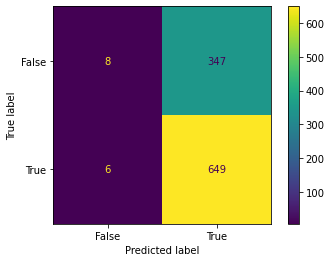

In [239]:
plot_confusion_matrix(logreg,X_test_sc,y_test)

In [240]:
y_pred = logreg.predict(X_test_sc)

In [241]:
f1_score(y_test,y_pred)

0.7861901877649908

In [242]:
accuracy_score(y_test,y_pred)

0.6504950495049505

In [243]:
lr_bal = LogisticRegression(random_state = 42, class_weight='balanced')

lr_bal.fit(X_train_sc,y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [244]:
y_pred_2 = lr_bal.predict(X_test_sc)

In [245]:
f1_score(y_test,y_pred_2)

0.6548672566371682

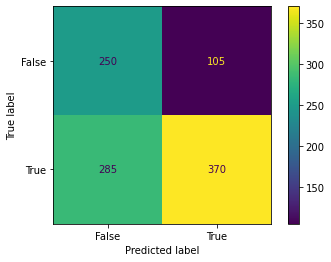

In [246]:
plot_confusion_matrix(lr_bal,X_test_sc,y_test)

In [247]:
df_w

,schedule_season,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,team_home_id,team_away_id,favorite_win,favorite_home,fav_elev_change,fav_temp_dif,fav_humidity_diff,fav_wind_diff
0,1979,Tampa Bay Buccaneers,Detroit Lions,TB,-3.0,30.0,TB,DET,True,True,0.0,0.000000,0.000000,0.000000
1,1979,Washington Redskins,Houston Oilers,TEN,-4.0,33.0,WAS,TEN,True,False,-1.8,8.000000,6.000000,11.000000
2,1979,St. Louis Cardinals,Dallas Cowboys,DAL,-4.0,37.0,ARI,DAL,True,False,25.6,-1.470588,13.020408,-1.102941
3,1979,Seattle Seahawks,San Diego Chargers,SEA,-2.0,42.5,SEA,LAC,False,True,0.0,0.000000,0.000000,0.000000
4,1979,New York Jets,Cleveland Browns,NYJ,-2.0,41.0,NYJ,CLE,False,True,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10493,2021,Tennessee Titans,Cincinnati Bengals,TEN,-4.0,48.5,TEN,CIN,False,True,0.0,0.000000,0.000000,0.000000
10494,2021,Kansas City Chiefs,Buffalo Bills,KC,-2.5,54.0,KC,BUF,True,True,0.0,0.000000,0.000000,0.000000
10495,2021,Tampa Bay Buccaneers,Los Angeles Rams,TB,-3.0,48.0,TB,LAR,False,True,0.0,0.000000,0.000000,0.000000
10496,2021,Kansas City Chiefs,Cincinnati Bengals,KC,-7.0,54.5,KC,CIN,False,True,0.0,0.000000,0.000000,0.000000


In [248]:
#df_w.to_csv('cleaned_nfl_data.csv')